# Import packages

In [4]:
%load_ext autoreload
%autoreload 2

import file_handler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display
import arabic_reshaper
import re

import matplotlib.cm as cmtest_roads
import matplotlib as mpl

import osmnx as ox
import importlib


from sklearn.linear_model import LinearRegression


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## basic Loading and table drawing functions

In [30]:
def getRoadChart_by_time(start_year,end_year,road_name,city):
    roads = []
    for year in range(start_year, end_year+1):
        for month in range(1, 13):
            item = ''
            try:
                item = file_handler.getRoadAddress(
                    str(year), str(month), city, road_name)
                if item != None:
                    roads.append(item)
            except Exception as e:
                print(f"Error: {e}")
                break

    df = file_handler.load_csv_file(roads[0])
    for i in range(len(roads)):
        df = df._append(file_handler.load_csv_file(roads[i]))
    df = df.reset_index()
    return df


def getRoadChart(road):
    city = 'تهران'

    roads = []

    for year in range(1395, 1403):
        for month in range(1, 13):
            item = ''
            try:
                item = file_handler.getRoadAddress(
                    str(year), str(month), city, road)
                if item != None:
                    roads.append(item)
            except:
                break

    df = file_handler.load_csv_file(roads[0])
    for i in range(len(roads)):
        df = df._append(file_handler.load_csv_file(roads[i]))
    df = df.reset_index()
    return df

def Draw_road_time_series(df2):
    plt.figure()  # Create a new figure for each plot
    df2['زمان شروع'] = df2['زمان شروع'].apply(lambda x: x.split()[0]) # drop the 00:00:00 part
    plt.plot(df2['زمان شروع'], df2['تعداد کل وسیله نقلیه'])
    x=df2['زمان شروع']
    # Customize x-axis ticks and labels
    # Rotate x-axis labels for better readability
    plt.xticks(x[::365],  rotation=45)
    # Add more customization as needed
    plt.title(file_handler.persian_fix(df2['نام محور'][0]))
    # Add title, labels, legend, etc.
    plt.xlabel(file_handler.persian_fix('تاریخ'))
    plt.ylabel(file_handler.persian_fix('تعداد خودرو '))
    plt.legend(['Legend'])

def Draw_road_time_series_smooth(df2, window=7):
    plt.figure()  # Create a new figure for each plot
    df2['زمان شروع'] = df2['زمان شروع'].apply(lambda x: x.split()[0]) # drop the 00:00:00 part
    ave = df2['تعداد کل وسیله نقلیه'].rolling(window=window).mean()
    plt.plot(df2['زمان شروع'], ave)
    x=df2['زمان شروع']
    # Customize x-axis ticks and labels
    # Rotate x-axis labels for better readability
    plt.xticks(x[::365],  rotation=45)
    # Add more customization as needed
    title = file_handler.persian_fix(df2['نام محور'][0])
    plt.title(title )
    # Add title, labels, legend, etc.
    plt.xlabel(file_handler.persian_fix('تاریخ'))
    plt.ylabel(file_handler.persian_fix('تعداد خودرو '))
    plt.legend([window + ' day trailling average'])
    plt.savefig("img/" +file_handler.persian_fix(title) + ".png", dpi=300)

## test the function on some data:

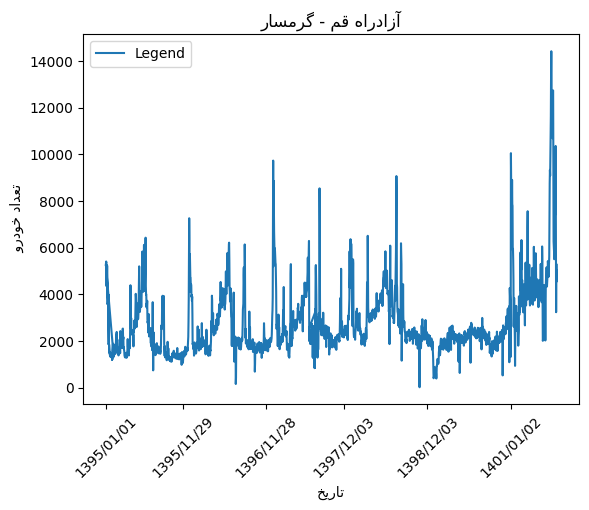

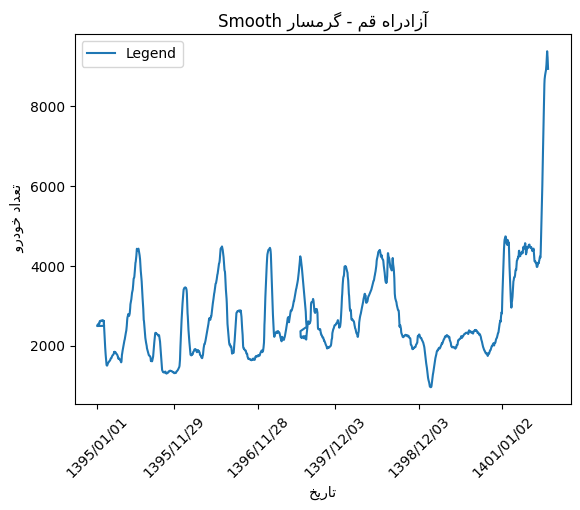

In [6]:

df2 = getRoadChart('113201')
df3 = getRoadChart('113201')
Draw_road_time_series(df2)
Draw_road_time_series_smooth(df3, window=30)



# Load the road_code of each city :
load the road_code and road_name of each city and copple them

In [7]:
def Load_road_code_of_city(city):
    codes = list(map ( lambda x: re.search('([0-9]{6,6})', x).group(),file_handler.get_dayly_data_path_with_year_month_city('1395','2',str(city))))
    return codes

def Load_road_name_of_city(city):
    t = file_handler.get_dayly_data_path_with_year_month_city('1395','2',str(city))
    names = {}
    for i in range(len(t)):
        names[codes[i]] = ' '.join(t[i].split('/')[-1].split(' ')[2:-1])
    return names

def Load_roads_code_of_contry():
    codes = []
    for item in file_handler.Citys:
        codes.extend(Load_road_code_of_city(item))
    return codes

def Load_roads_name_of_contry():
    t = []
    for item in file_handler.Citys:
        t.extend(file_handler.get_dayly_data_path_with_year_month_city('1395','2',str(item)))

    names = {}
    for i in range(len(t)):
        names[codes[i]] = ' '.join(t[i].split('/')[-1].split(' ')[2:-1])
    return names

codes = Load_road_code_of_city('تهران')
names =Load_road_name_of_city('تهران')
names
# codes = Load_roads_code_of_contry()
# names = Load_roads_name_of_contry()
# len(all_roads_name)

{'113201': '\u202bآزادراه قم - گرمسار\u202c',
 '113203': '\u202bتهران - قم (آزادراه)\u202c',
 '113204': '\u202bتهران - ساوه (ابتداي آزادراه)\u202c',
 '113205': '\u202bتهران - جاجرود\u202c',
 '113206': '\u202bتهران - پرديس (ابتداي آزادراه)\u202c',
 '113207': '\u202bتهران - \u200dپرديس (انتهاي آزادراه)\u202c',
 '113209': '\u202bتهران - پاکدشت\u202c',
 '113210': '\u202bعوارضي تهران - قم\u202c',
 '113211': '\u202bچرمشهر - حسن\u200cآباد \u202c',
 '113212': '\u202bامام زاده داوود - تهران\u202c',
 '113213': '\u202bتهران - لواسان (طلاييه)\u202c',
 '113214': '\u202bتهران - لواسان (سوهانک)\u202c',
 '113228': '\u202bآزادراه تهران - ساوه(پرند)\u202c',
 '113251': '\u202bآزادراه گرمسار - قم\u202c',
 '113253': '\u202bقم - تهران (آزادراه)\u202c',
 '113254': '\u202bساوه - تهران (ابتداي آزادراه)\u202c',
 '113255': '\u202bجاجرود - تهران\u202c',
 '113256': '\u202bپرديس - تهران (ابتداي آزادراه)\u202c',
 '113257': '\u202bپرديس - تهران (انتهاي آزادراه)\u202c',
 '113259': '\u202bپاکدشت - تهران\u202c',
 '11326

## Make dictionary roads_codes & roads_names :

In [8]:
def Make_dict(roads_codes):
    roads = dict()
    for code in roads_codes:
        roads[code] = getRoadChart(str(code))
    return roads

test_roads = Make_dict(codes)


/tmp/ipykernel_4883/4052487330.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(file_handler.load_csv_file(roads[i]))


/tmp/ipykernel_4883/3994186182.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()  # Create a new figure for each plot


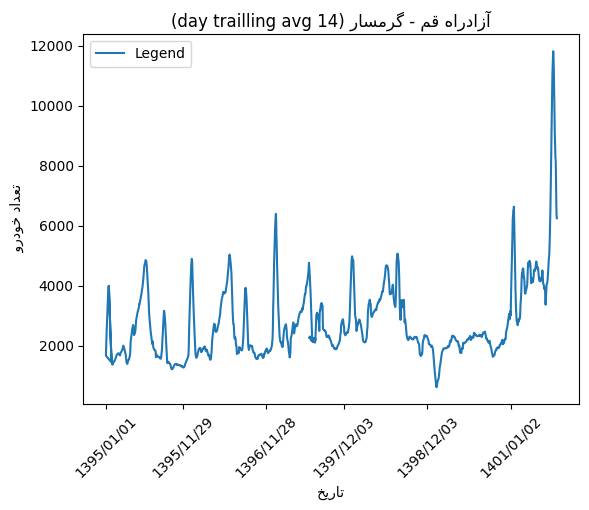

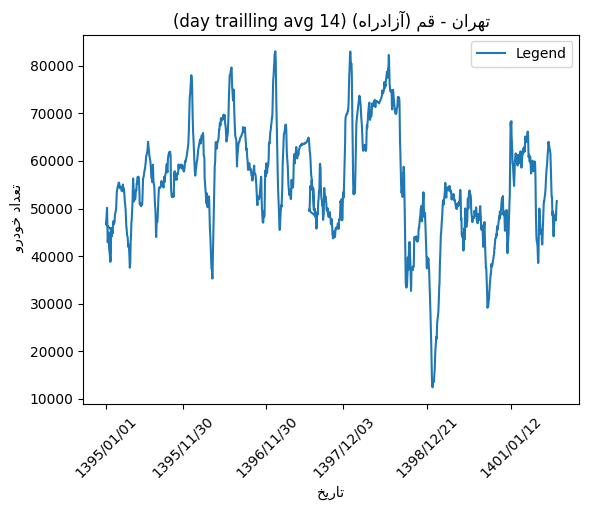

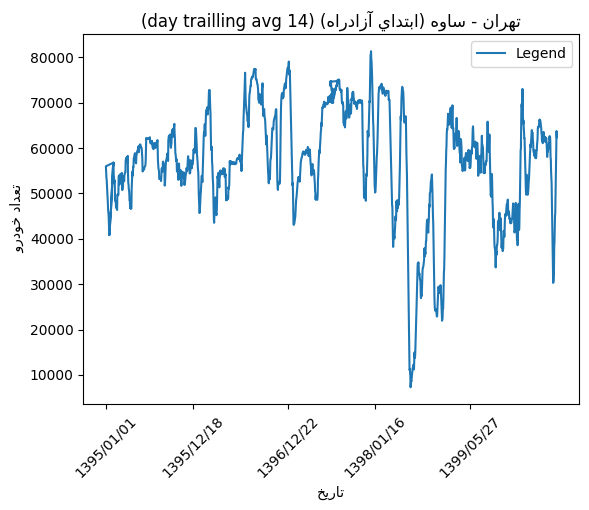

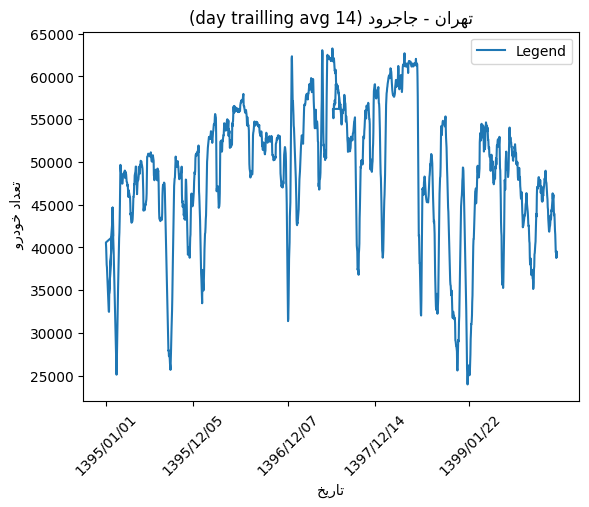

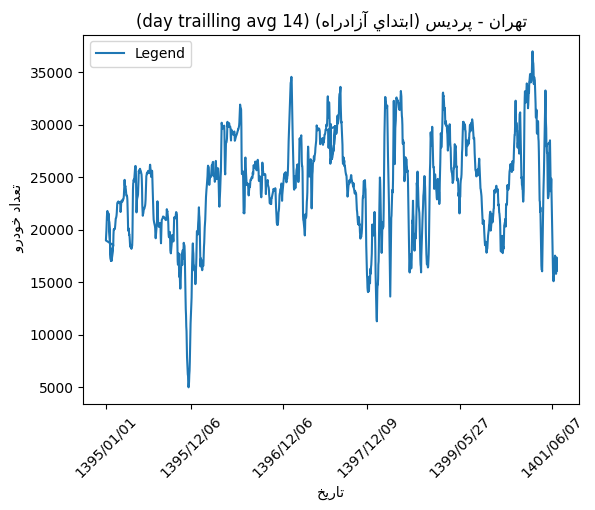

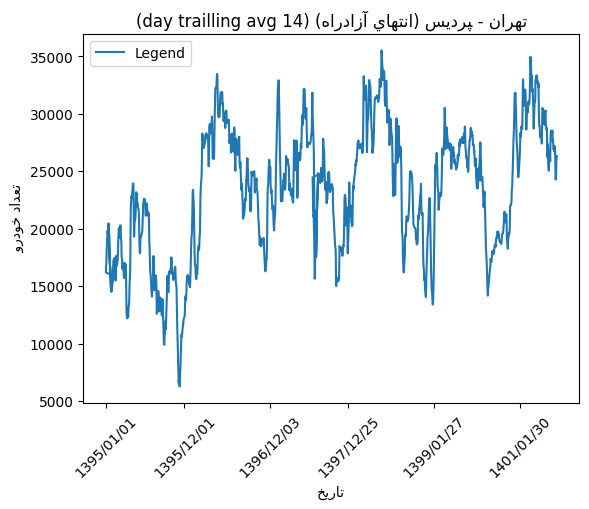

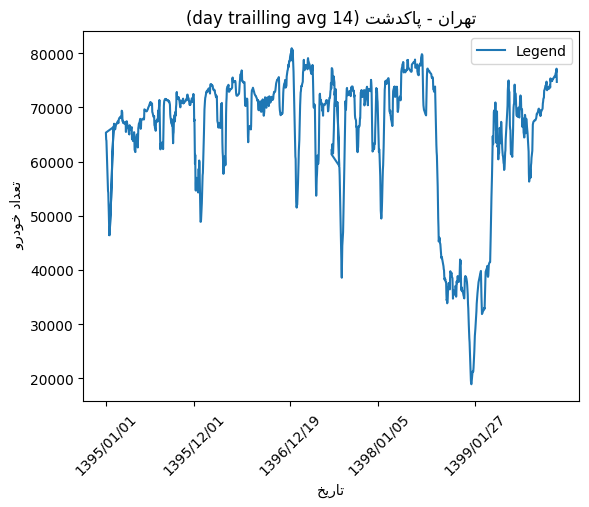

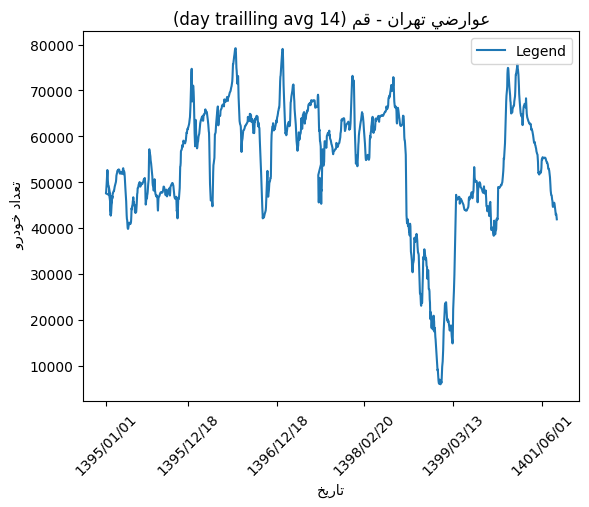

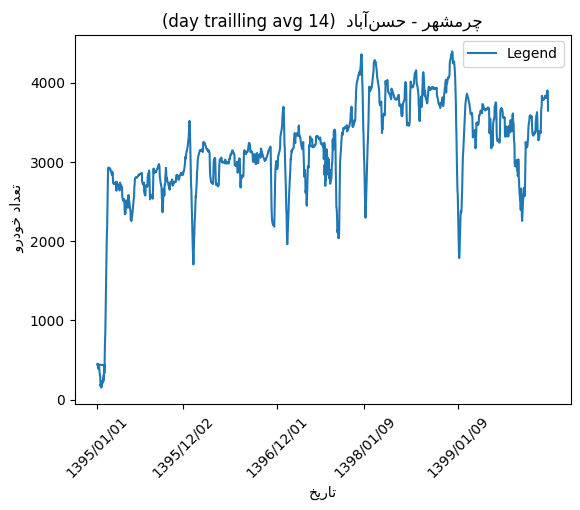

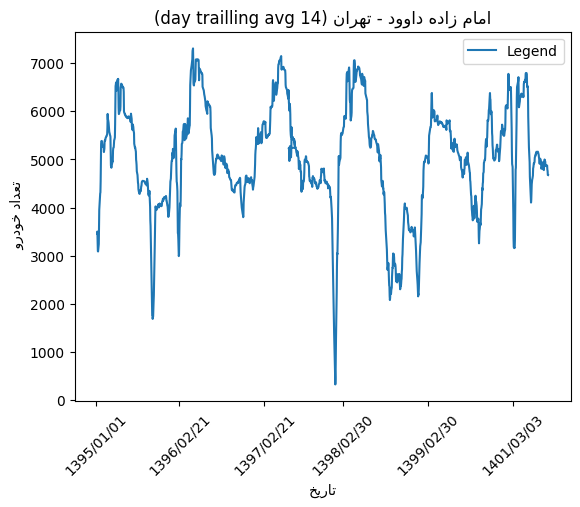

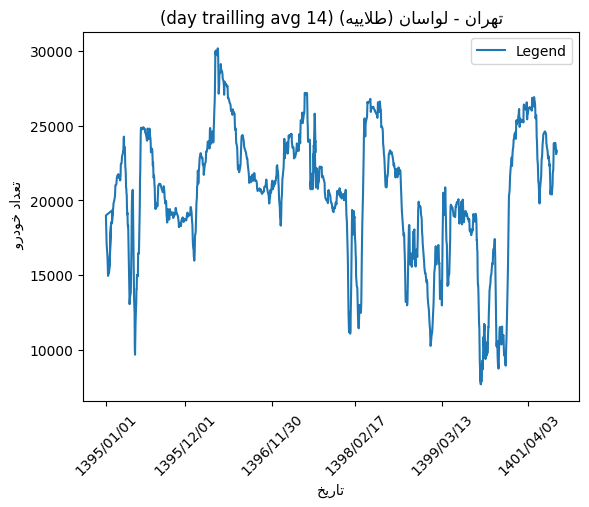

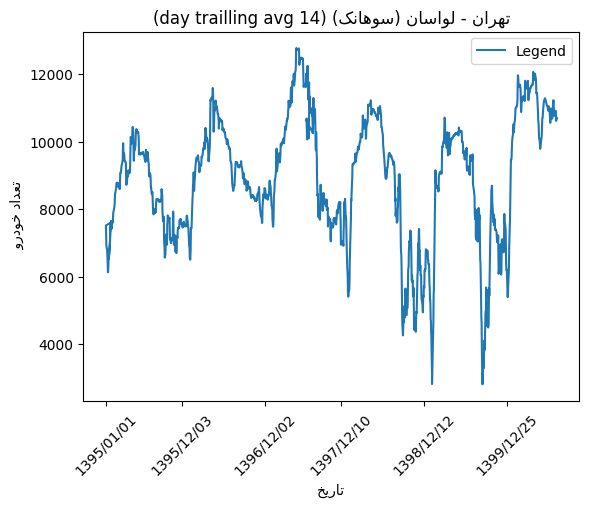

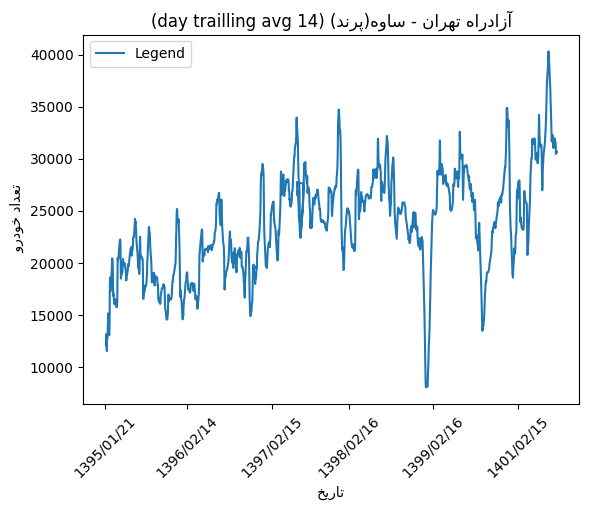

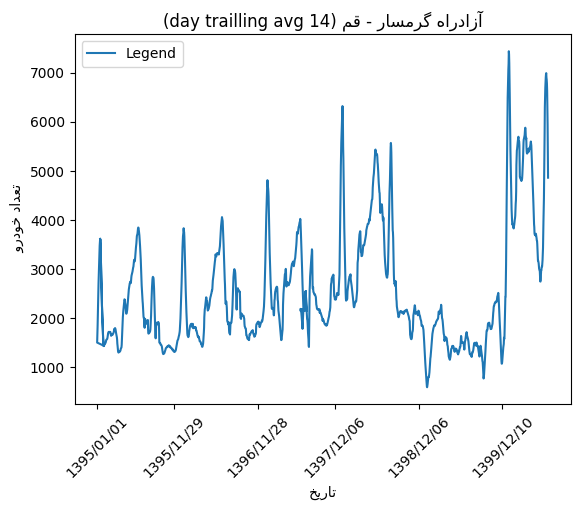

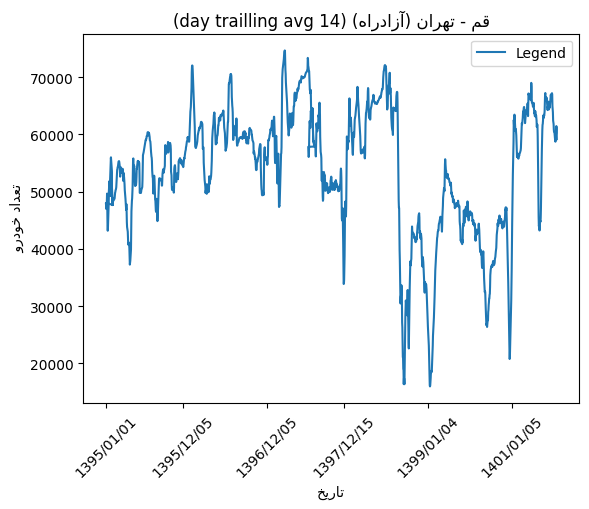

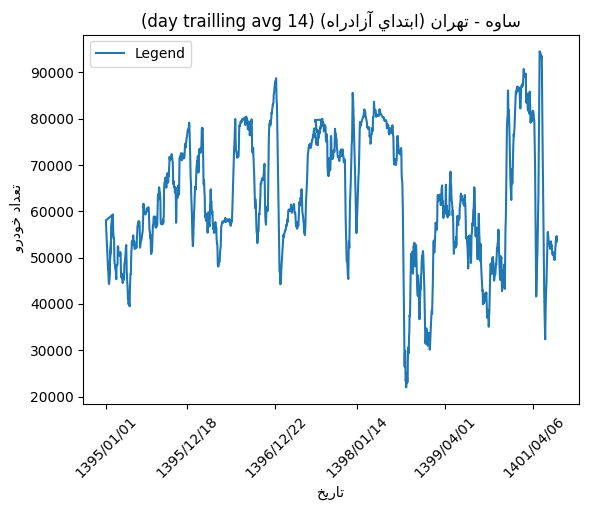

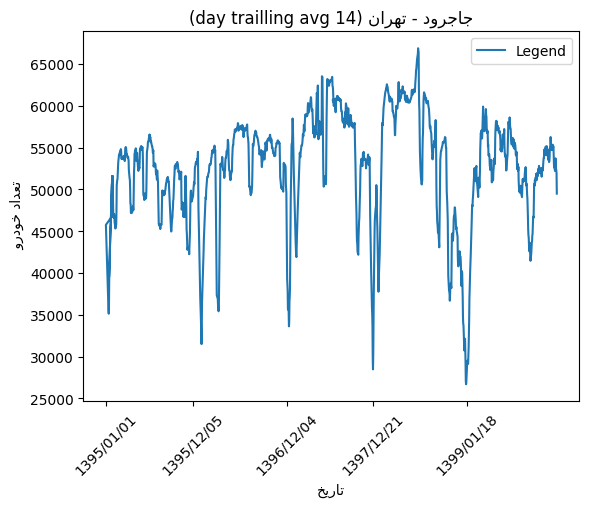

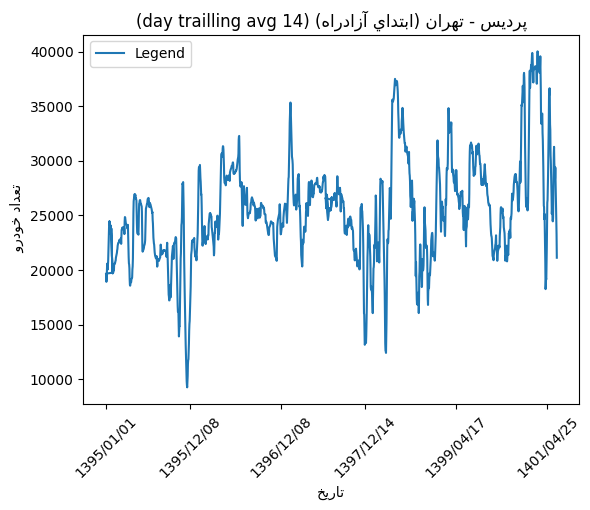

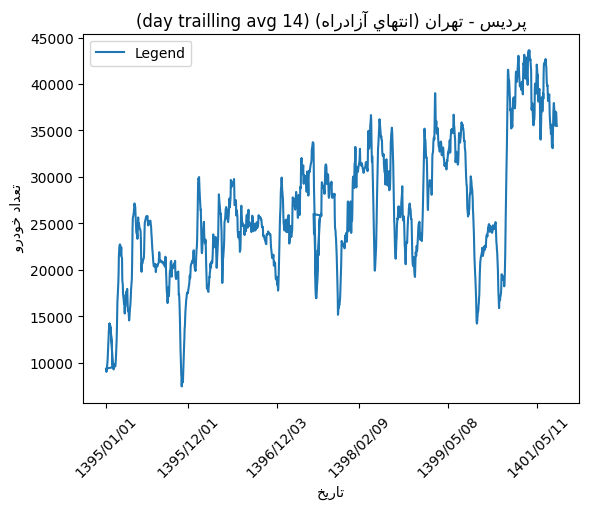

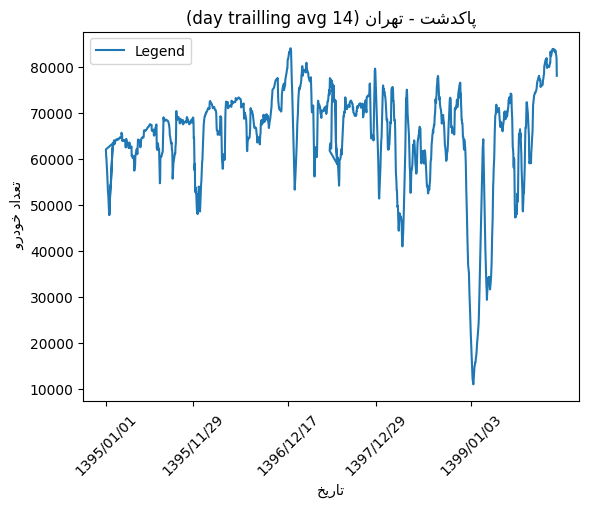

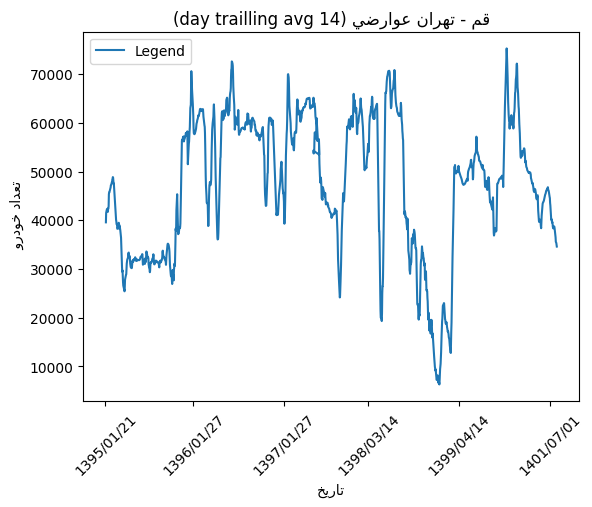

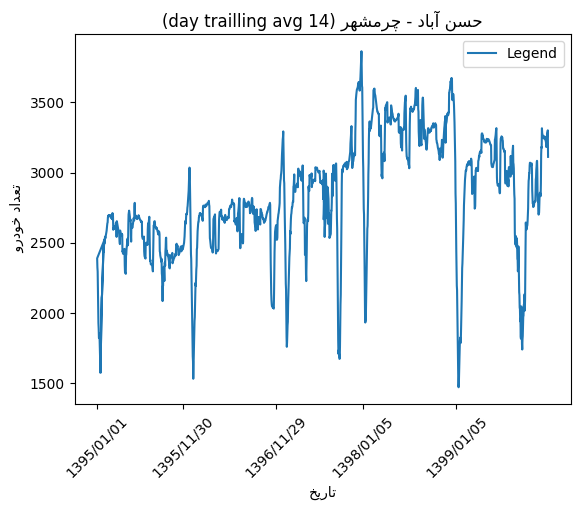

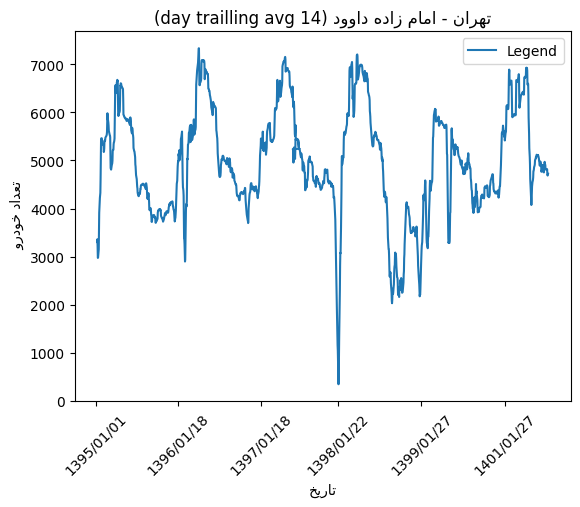

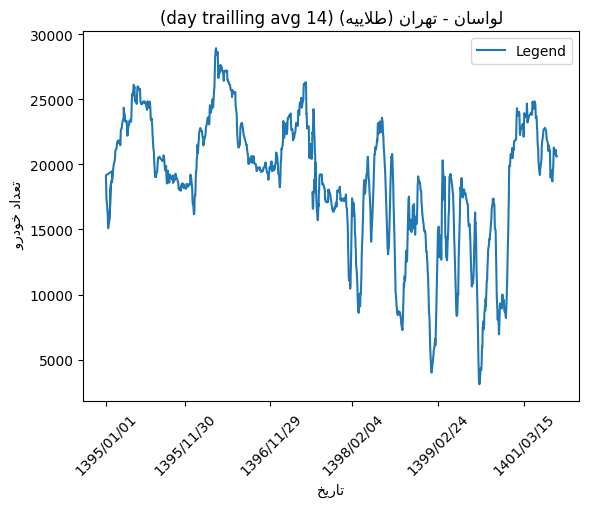

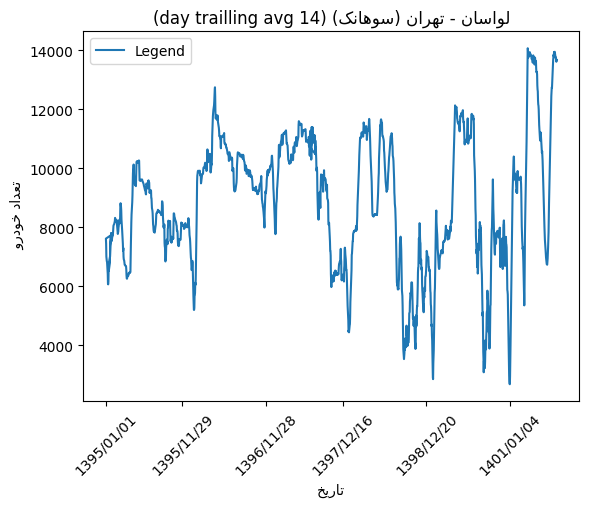

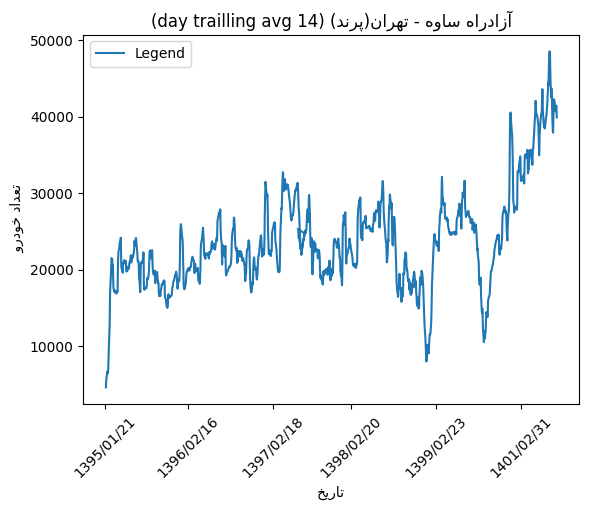

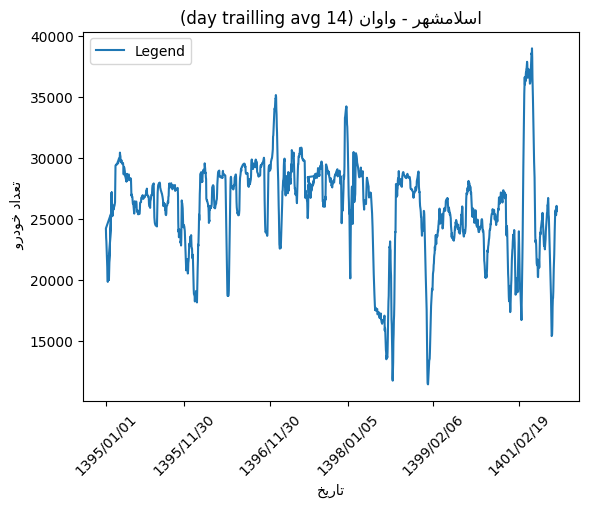

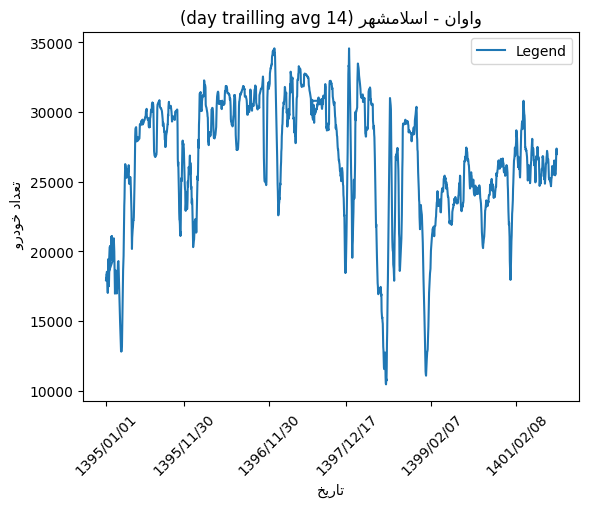

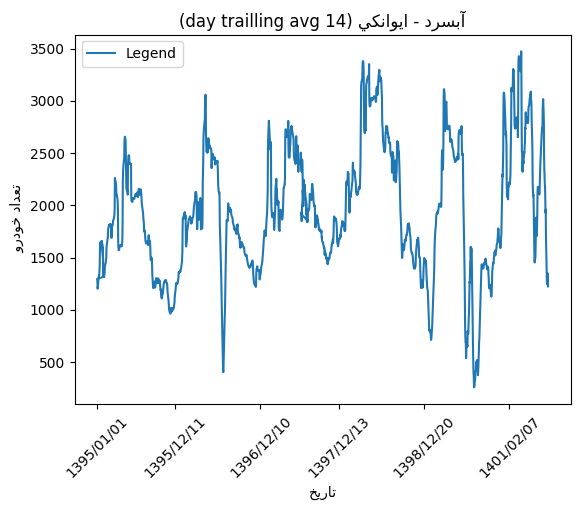

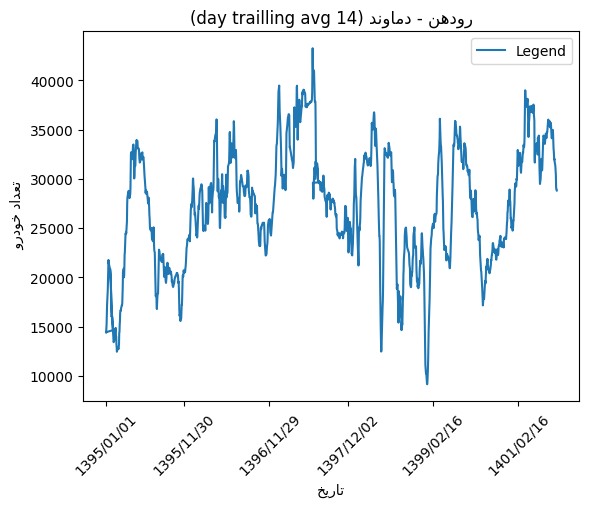

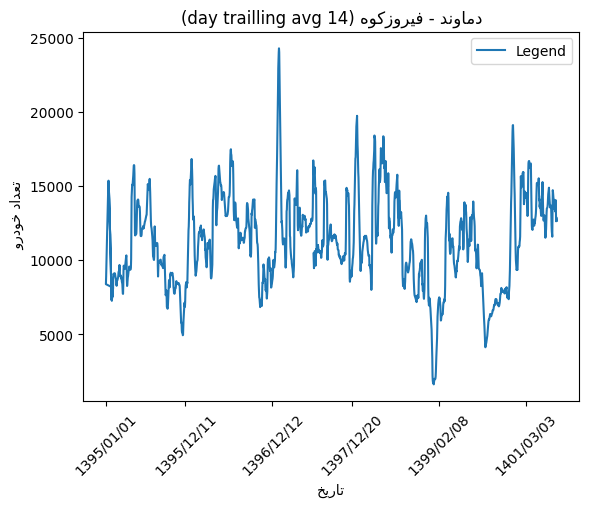

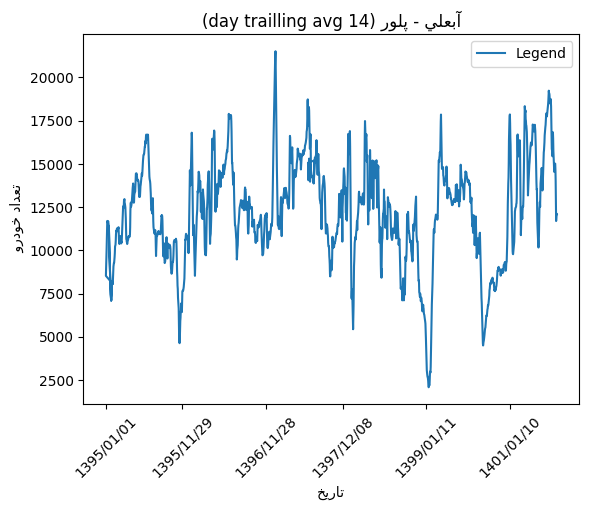

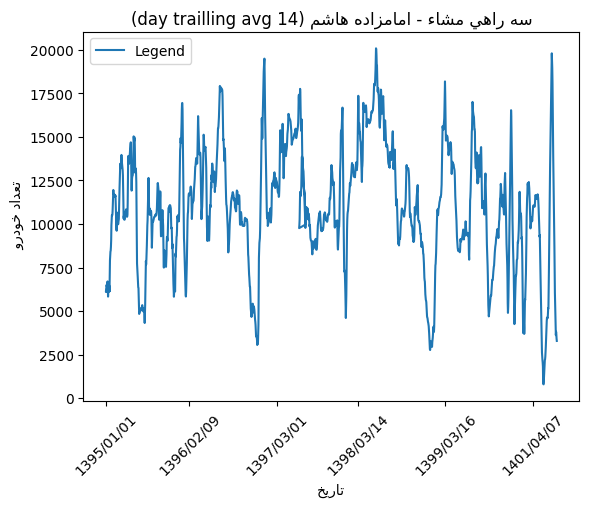

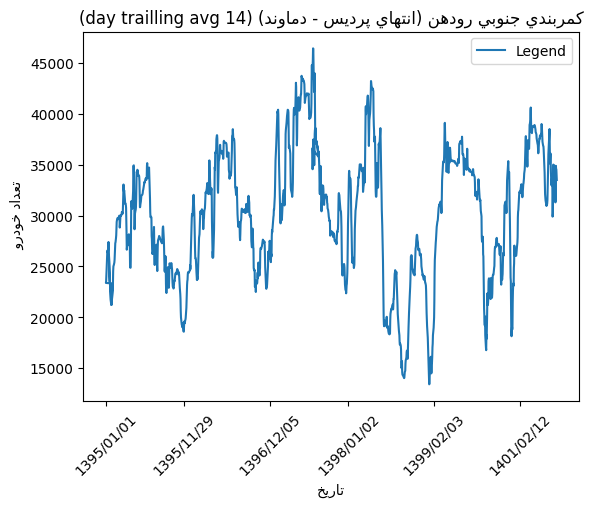

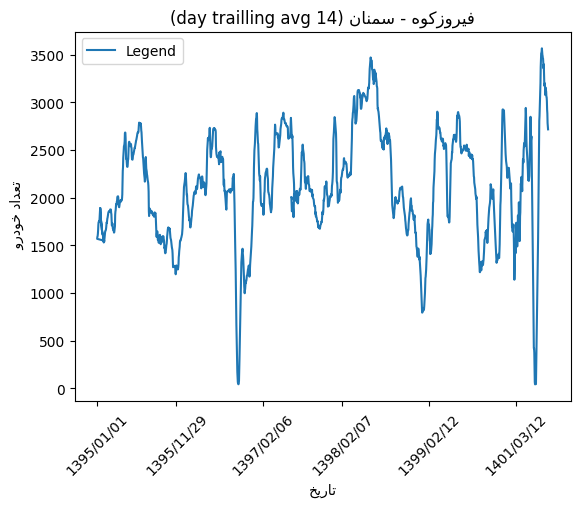

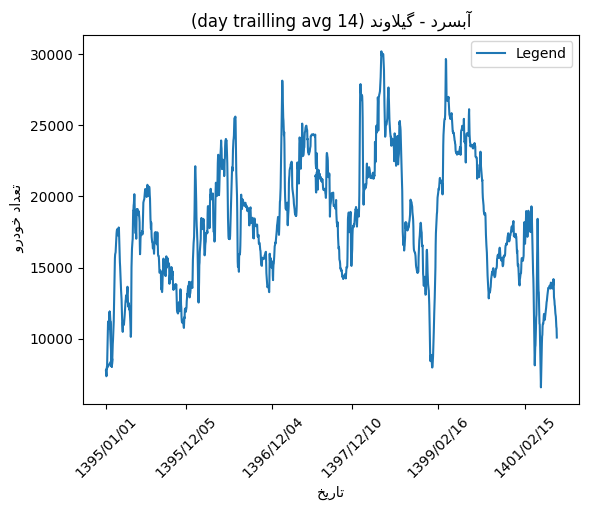

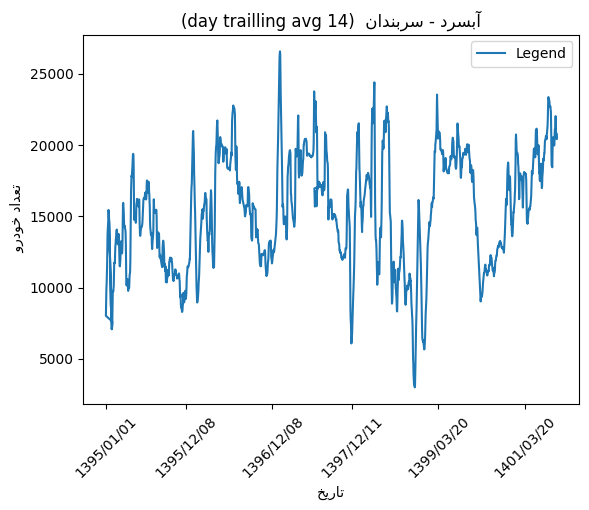

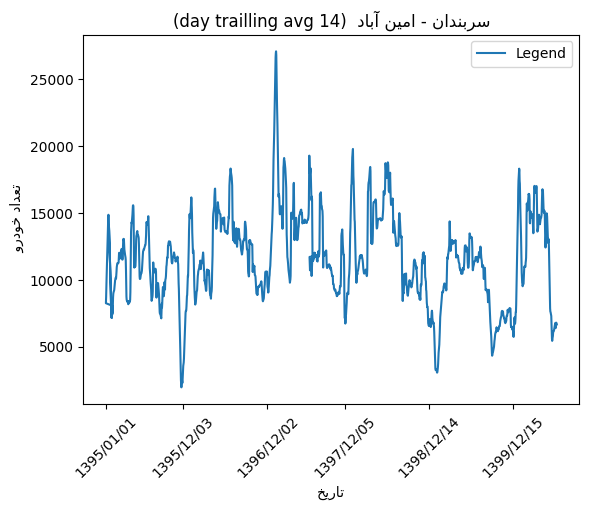

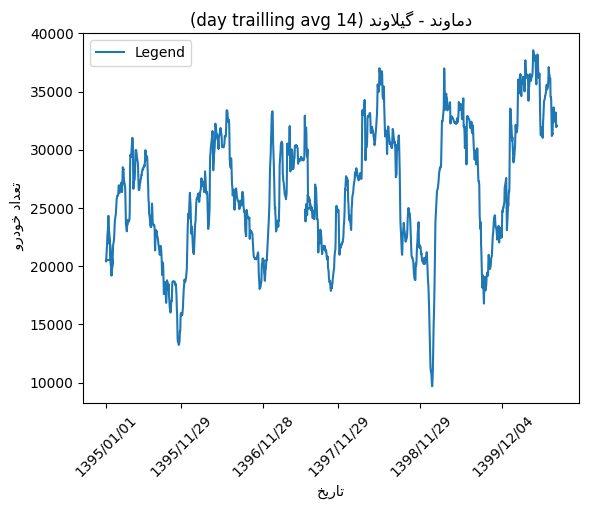

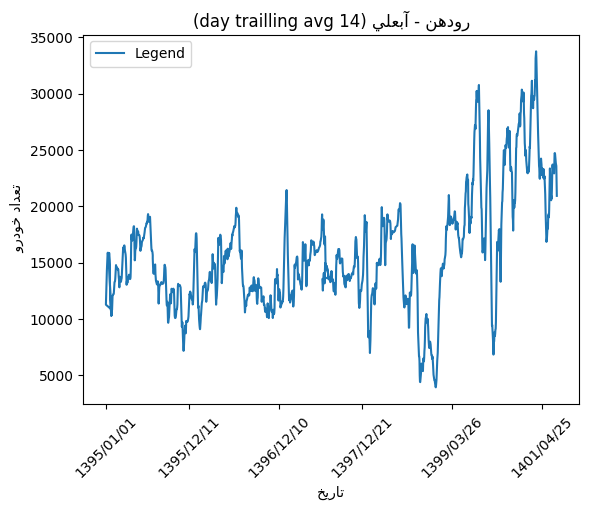

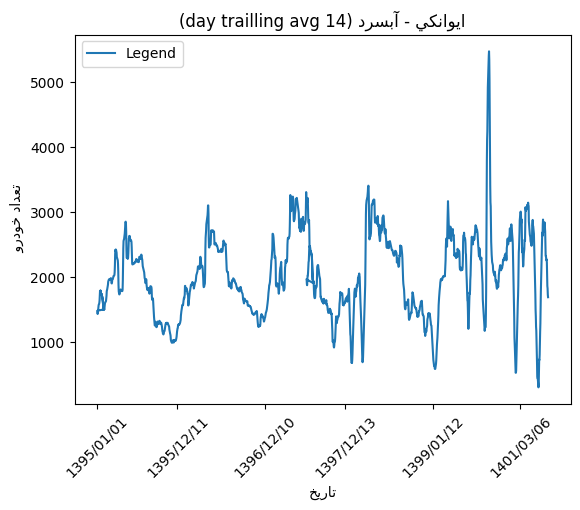

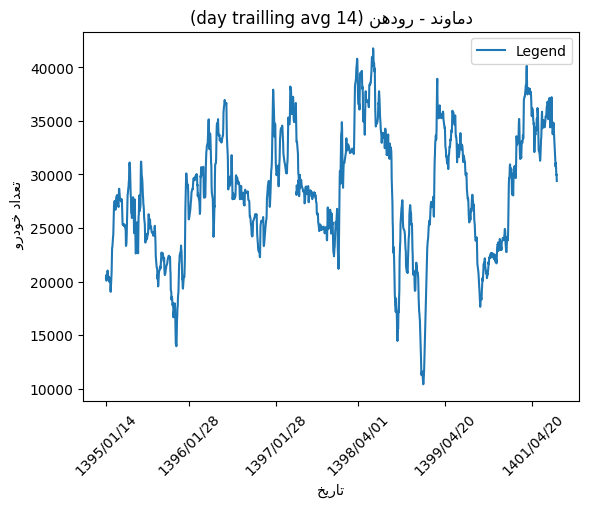

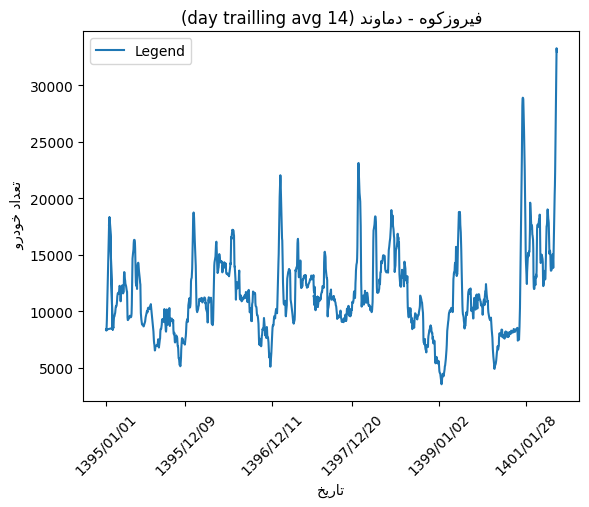

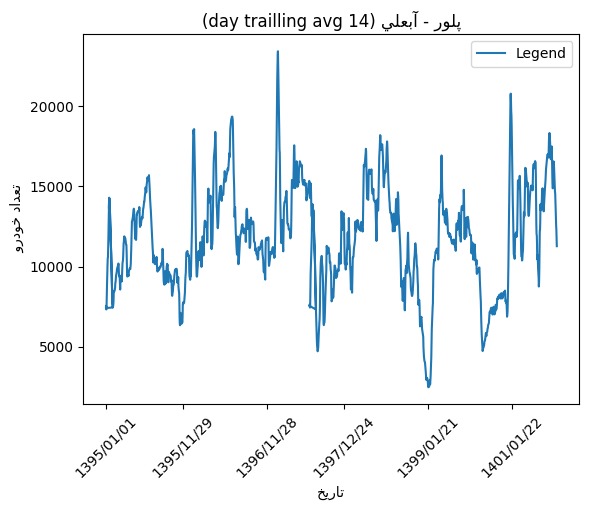

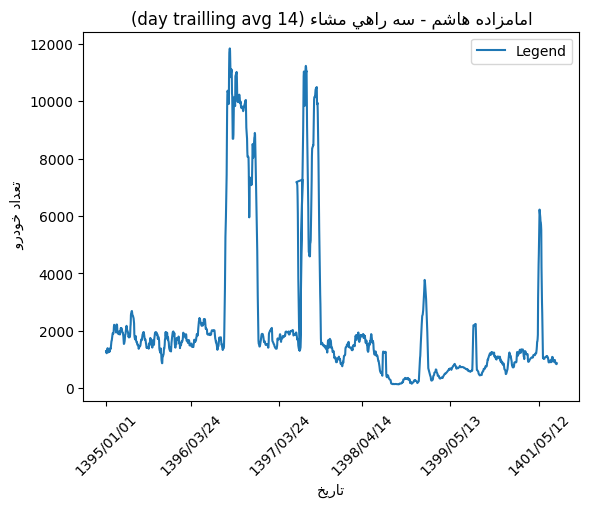

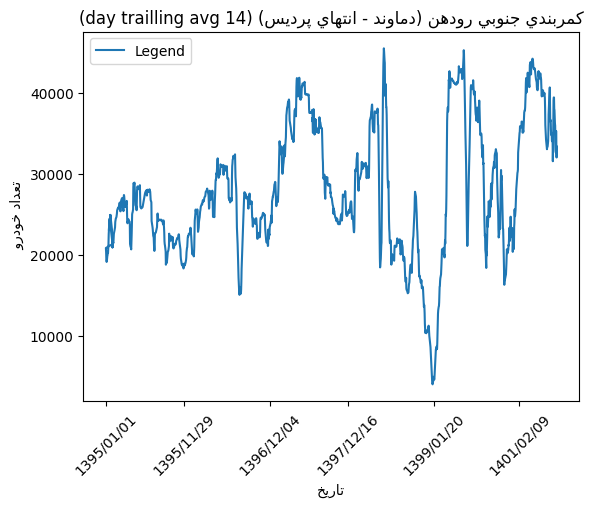

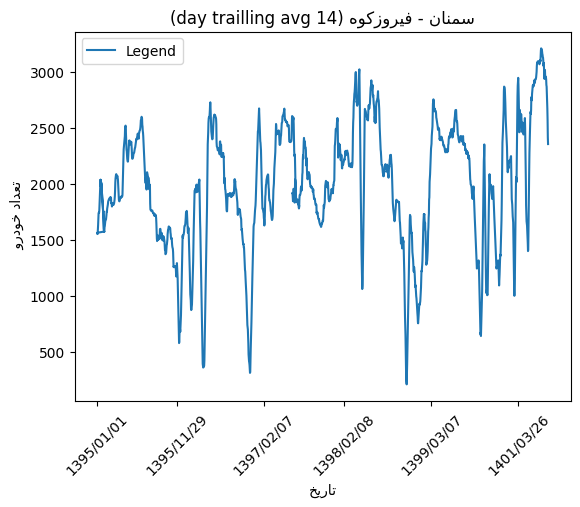

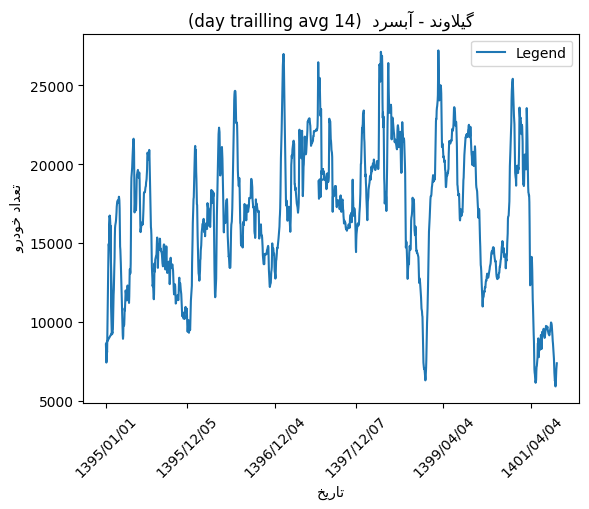

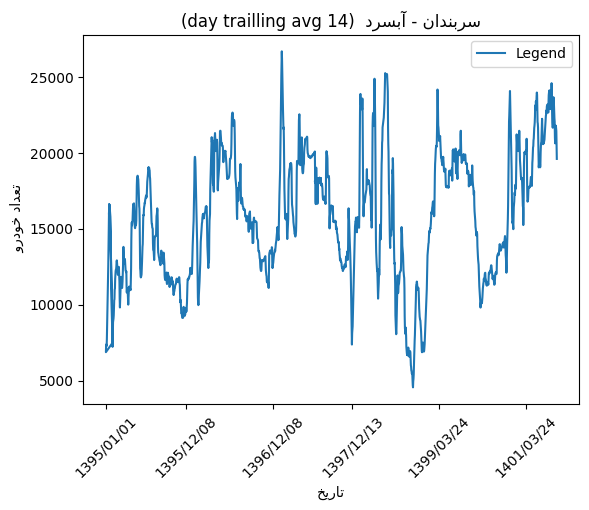

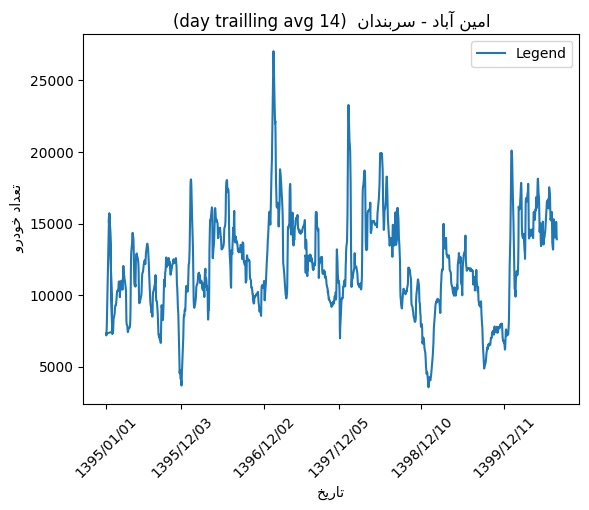

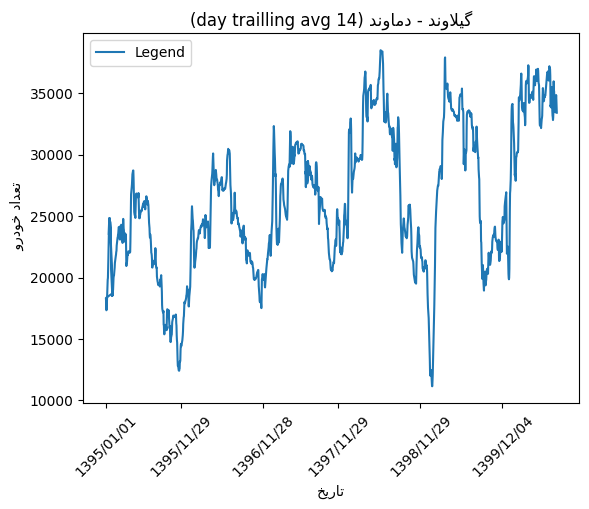

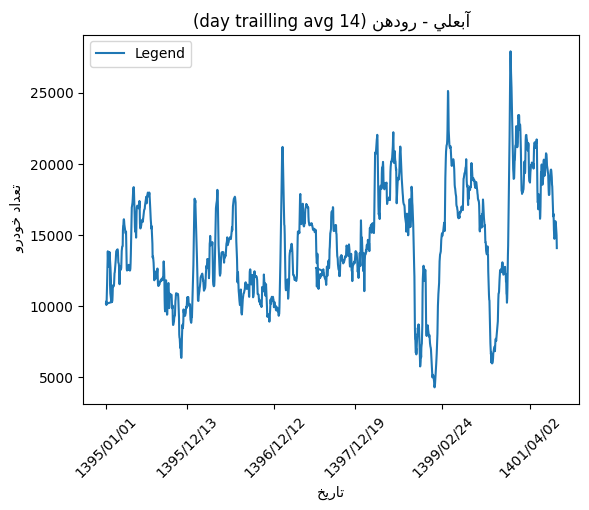

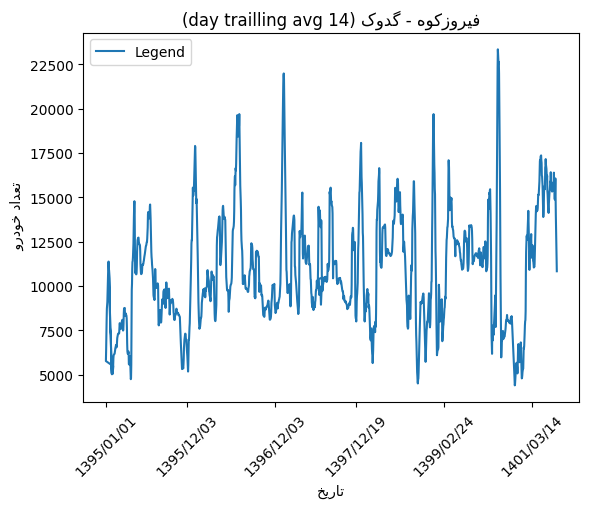

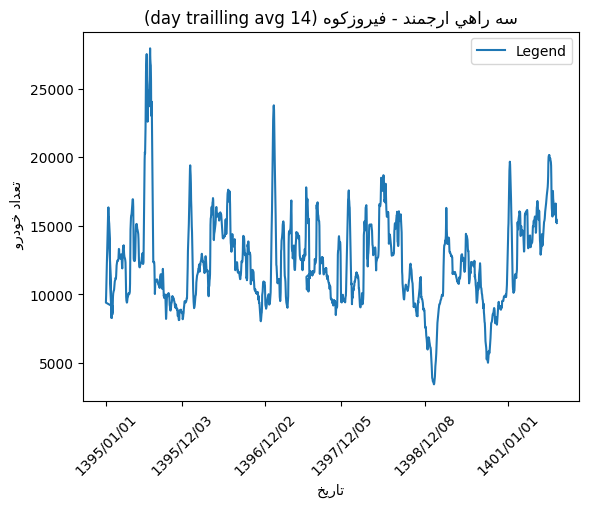

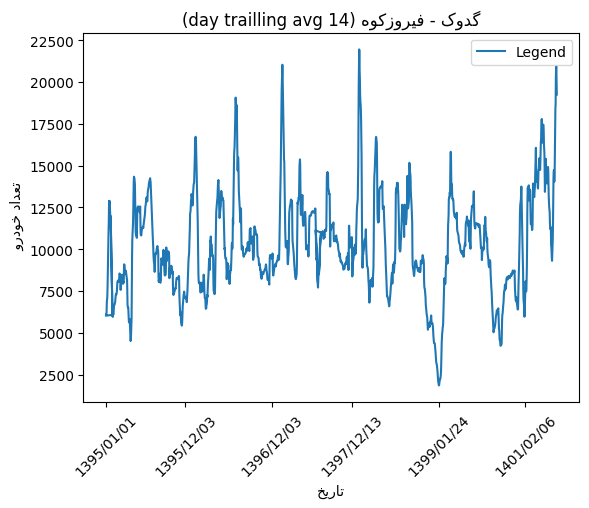

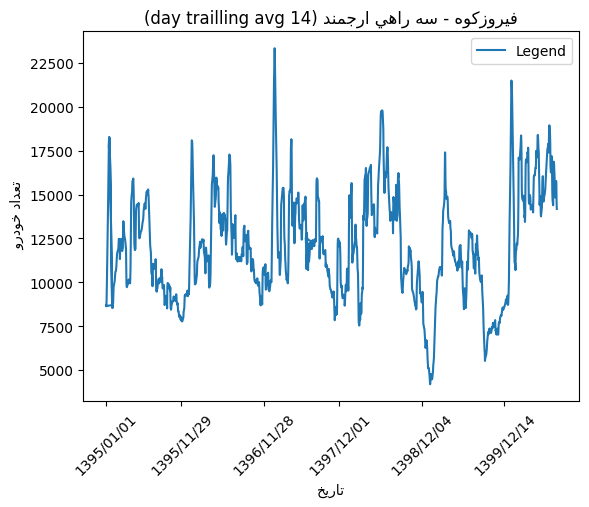

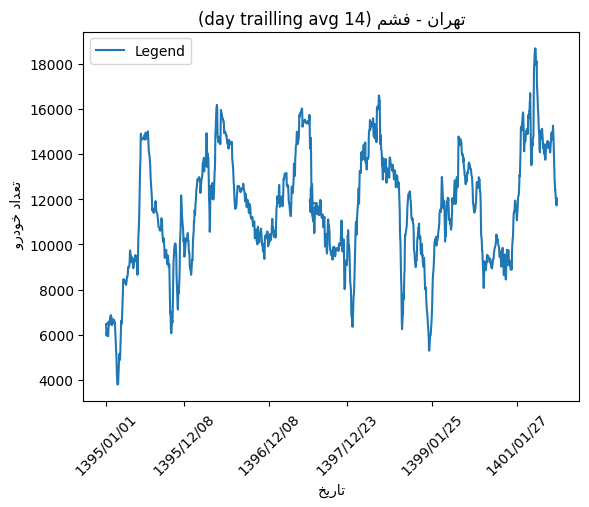

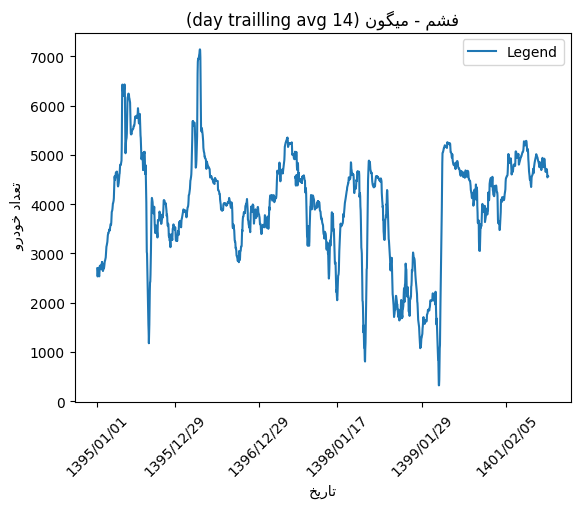

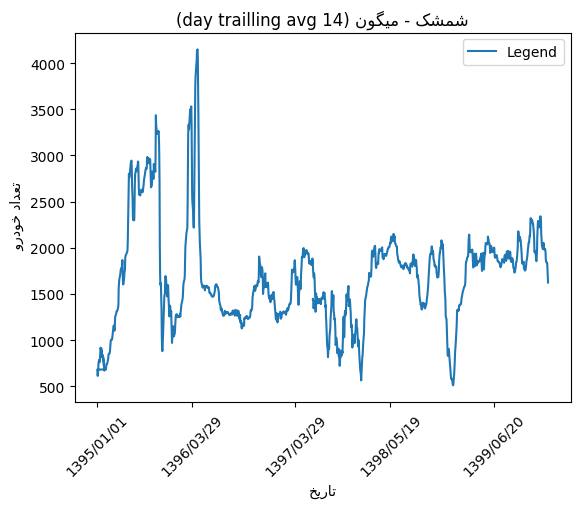

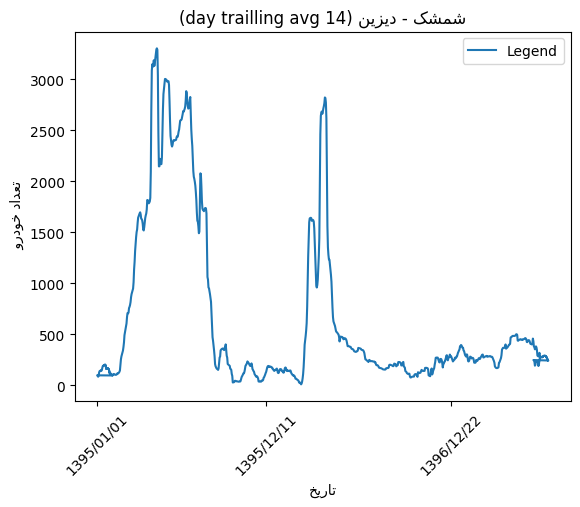

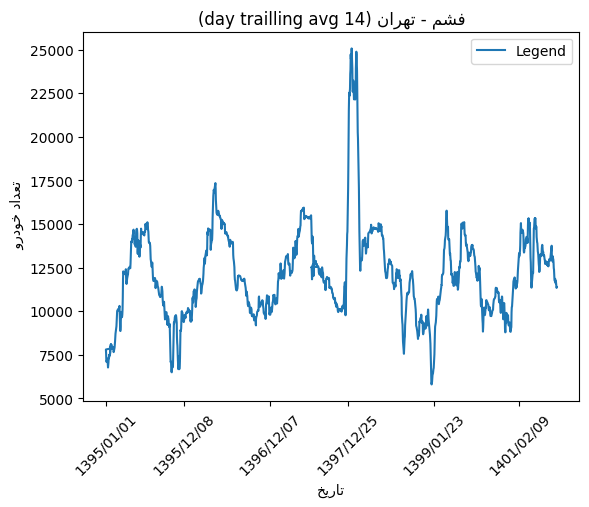

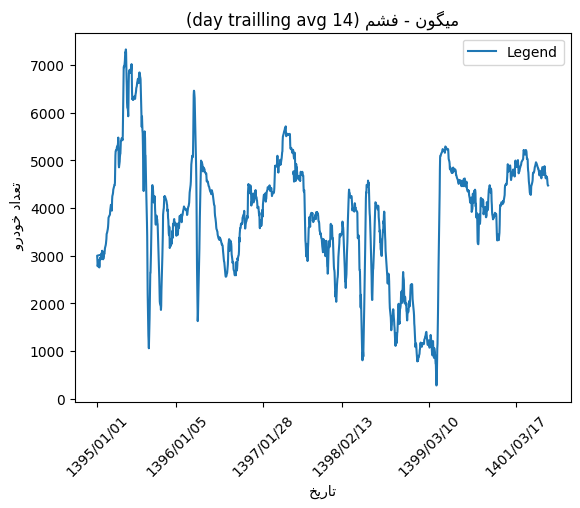

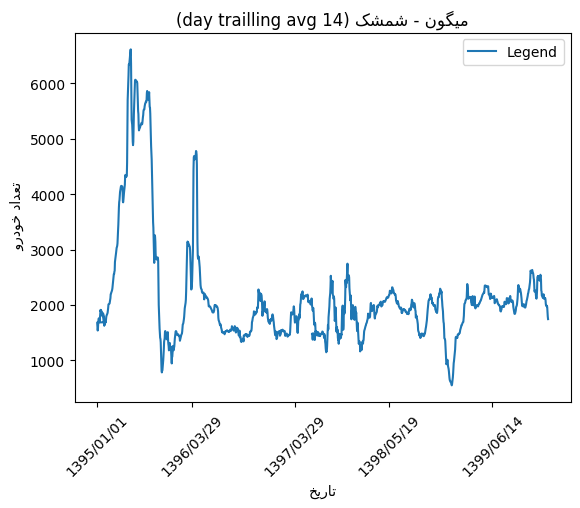

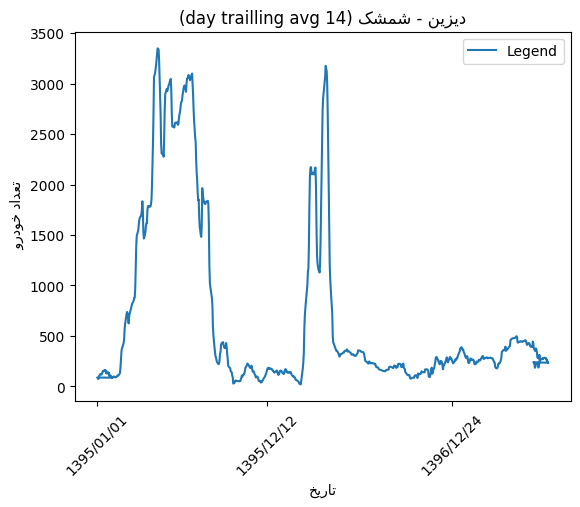

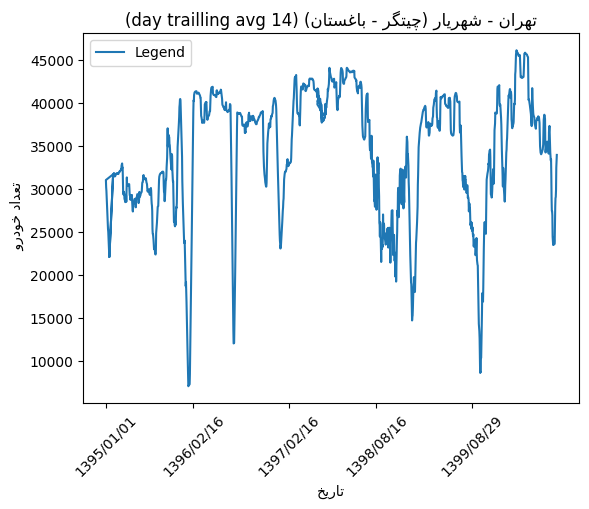

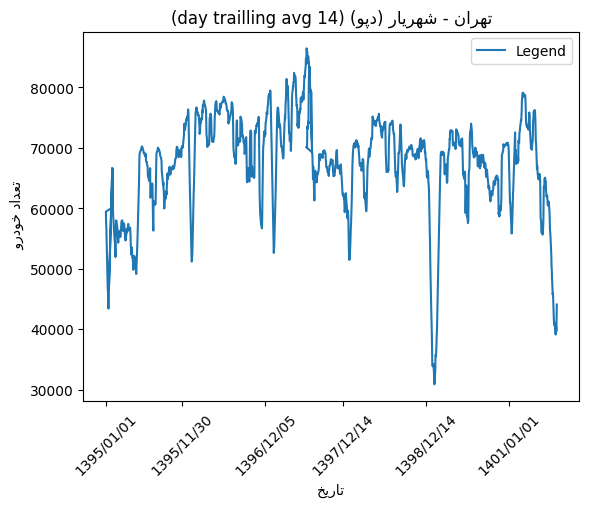

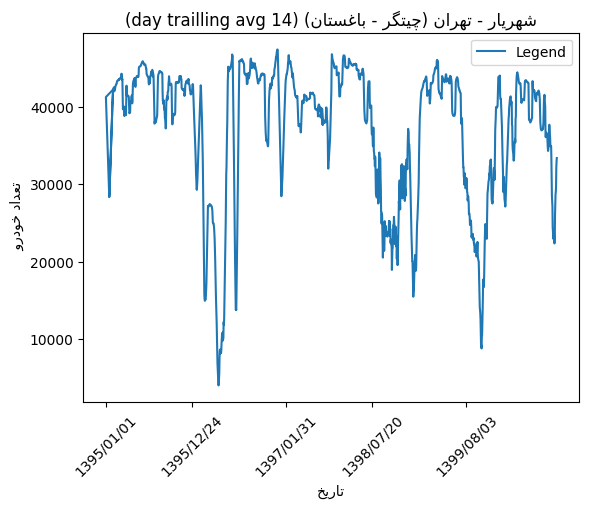

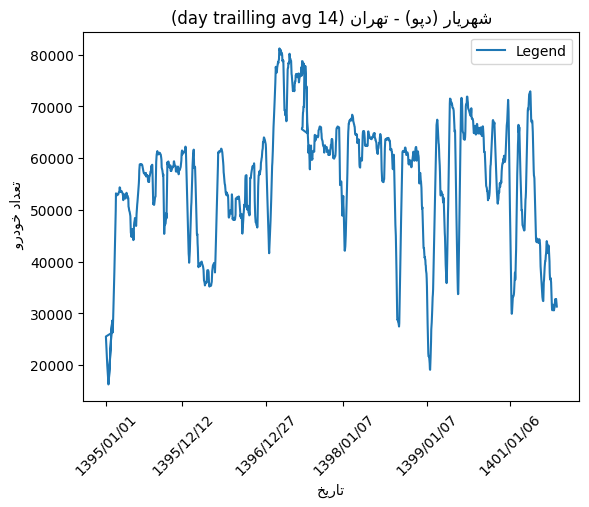

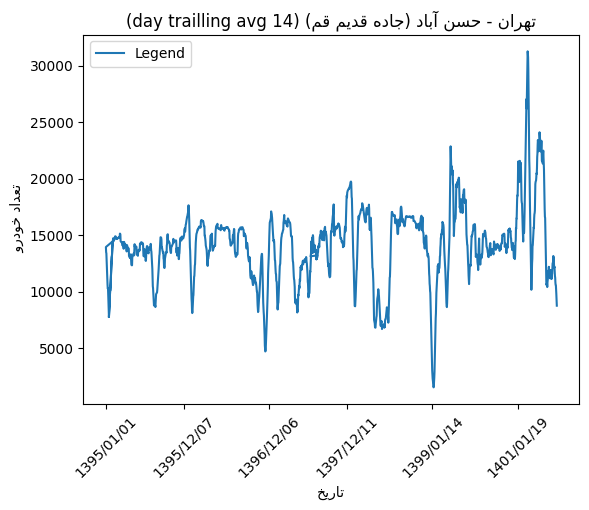

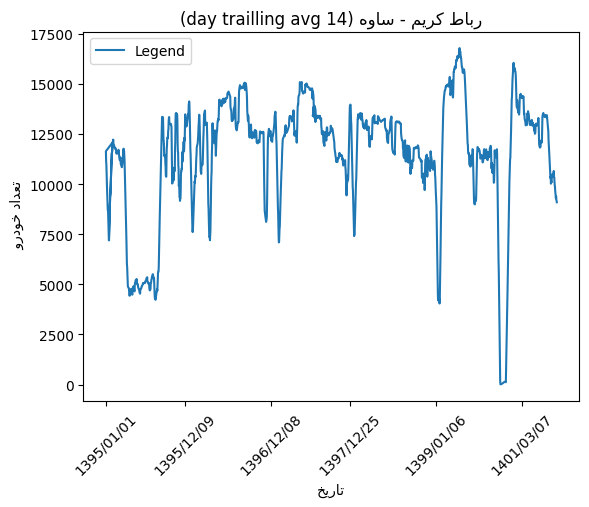

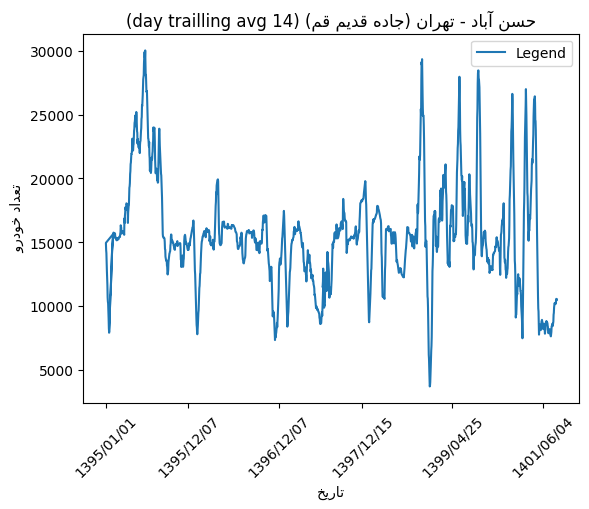

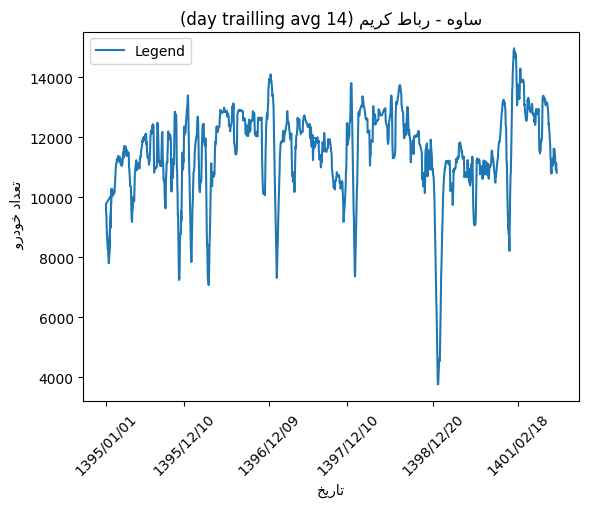

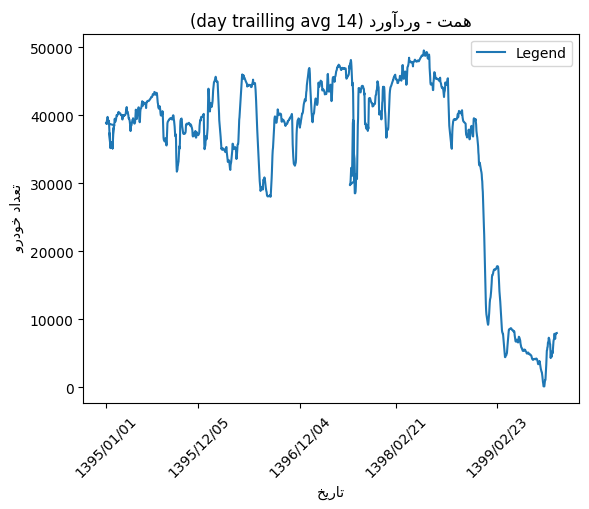

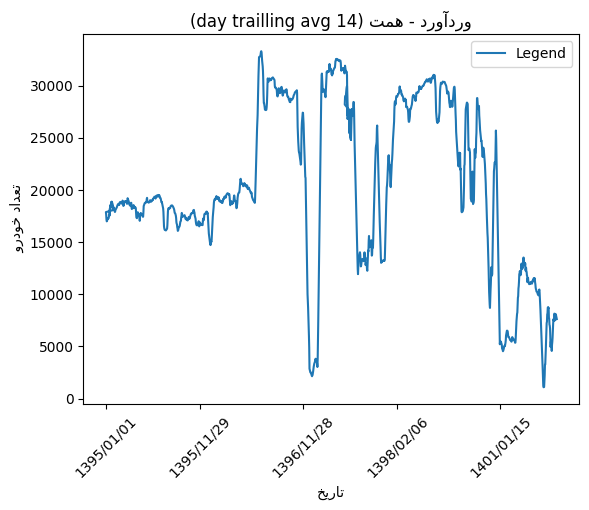

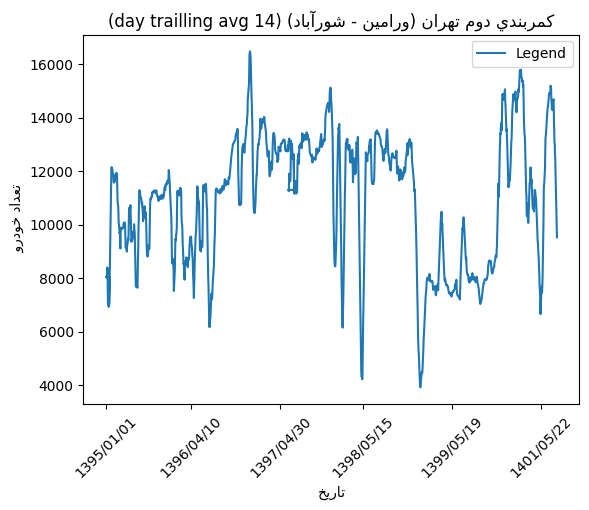

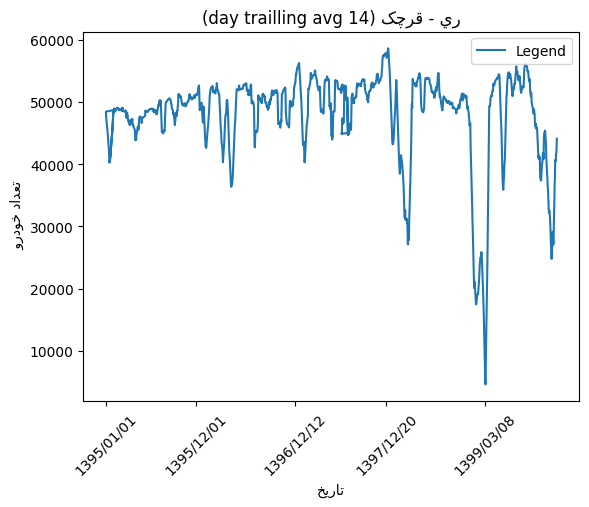

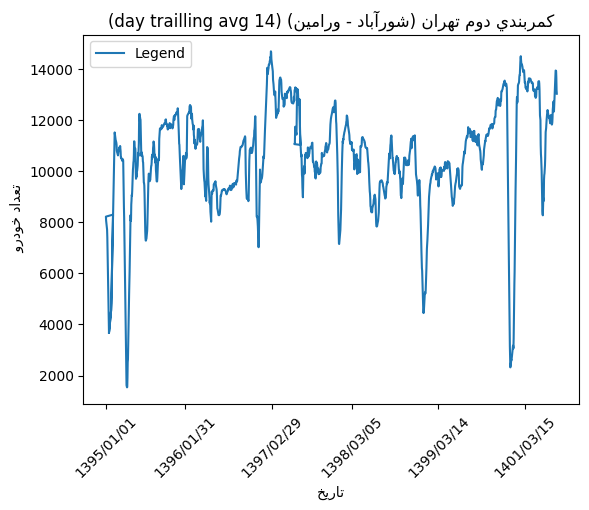

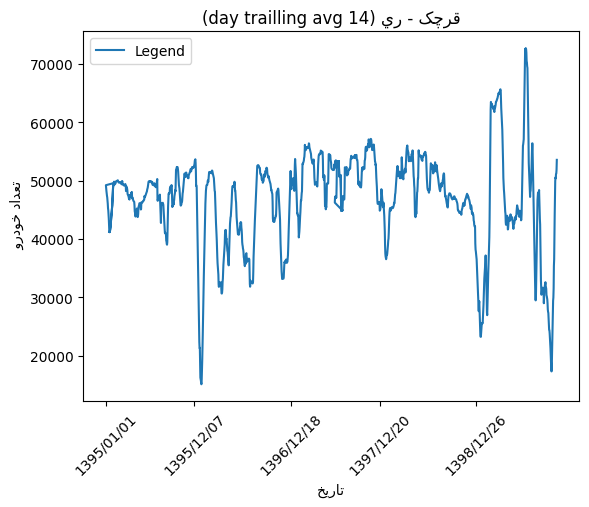

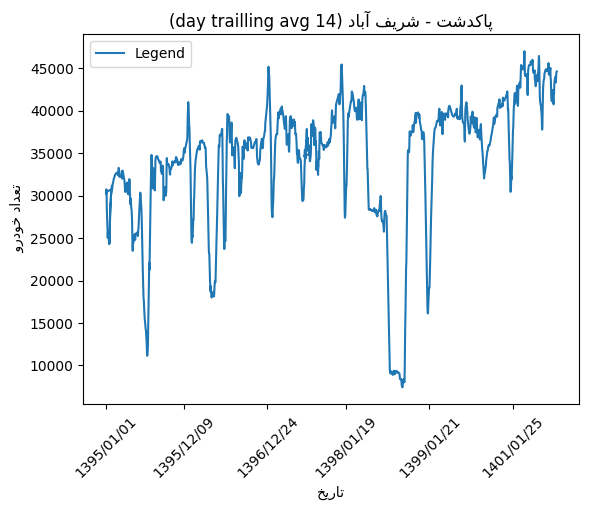

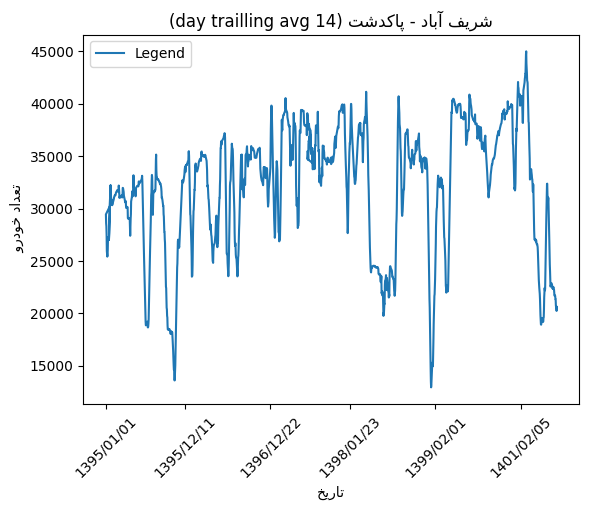

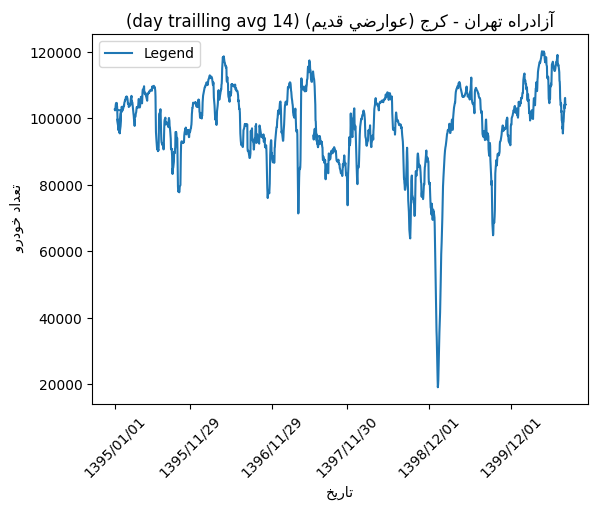

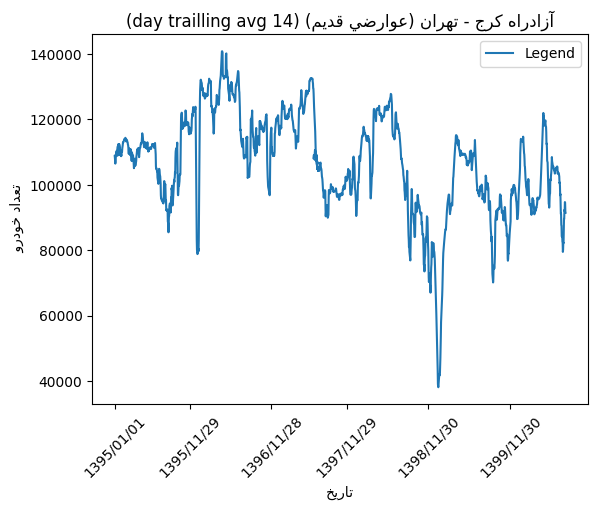

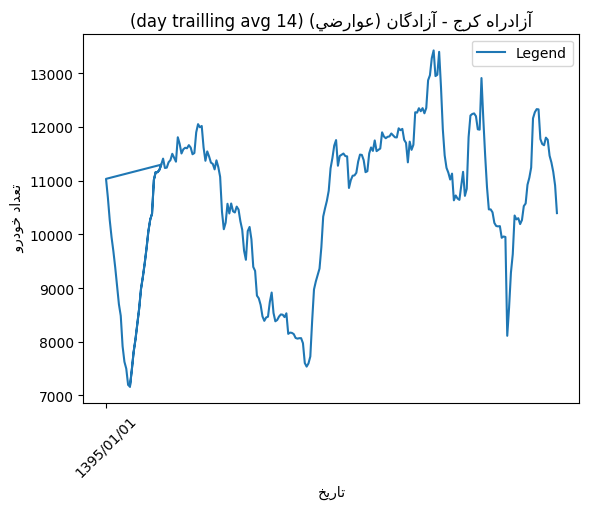

In [29]:
roads=test_roads

for code, df in roads.items():
    Draw_road_time_series_smooth(df, window=14)

# Cleaning Data:

In [10]:
# Working with an example df
df = test_roads['113201']

# TODO smooth worked time


# df.loc[df['مدت زمان کارکرد(دقیقه)'] < 1440]
df.drop(columns='index', inplace=True)

df

کد محور                      نام محور   زمان شروع           زمان پایان  \
0      113201           آزادراه قم - گرمسار  1395/01/01  1395/01/02 00:00:00   
1      113201           آزادراه قم - گرمسار  1395/01/02  1395/01/03 00:00:00   
2      113201           آزادراه قم - گرمسار  1395/01/03  1395/01/04 00:00:00   
3      113201           آزادراه قم - گرمسار  1395/01/04  1395/01/05 00:00:00   
4      113201           آزادراه قم - گرمسار  1395/01/05  1395/01/06 00:00:00   
...       ...                           ...         ...                  ...   
2020   113201  آزادراه قم - گرمسار (چرمشهر)  1401/07/13  1401/07/13 18:35:00   
2021   113201  آزادراه قم - گرمسار (چرمشهر)  1401/07/27  1401/07/28 00:00:00   
2022   113201  آزادراه قم - گرمسار (چرمشهر)  1401/07/28  1401/07/29 00:00:00   
2023   113201  آزادراه قم - گرمسار (چرمشهر)  1401/07/29  1401/07/30 00:00:00   
2024   113201  آزادراه قم - گرمسار (چرمشهر)  1401/07/30  1401/08/01 00:00:00   

      مدت زمان کارکرد(دقیقه)  تعداد کل وسیله نقلیه  تعداد وسیله نقلیه کلاس 1  \
0                     1440.0                  5257                      5138   
1                     1440.0                  5397                      5255   
2                     1440.0                  4778                      4572   
3                     1440.0                  4525                      4379   
4                     1440.0                  4340                      4188   
...                      ...                   ...                       ...   
2020                     NaN                  5975                      4502   
2021                     NaN                  3232                      1718   
2022                     NaN                  5300                      3003   
2023                     NaN                  4543                      2600   
2024                     NaN                  5021                      2668   

      تعداد وسیله نقلیه کلاس 2  تعداد وسیله نقلیه کلاس 3  \
0                           36                        30   
1                           37                        23   
2                           40                        24   
3                           29                        28   
4                           21                        26   
...                        ...                       ...   
2020                       343                       194   
2021                       406                       240   
2022                       607                       264   
2023                       432                       251   
2024                       579                       292   

      تعداد وسیله نقلیه کلاس 4  تعداد وسیله نقلیه کلاس 5  سرعت متوسط  \
0                           32                        21      100.42   
1                           55                        27      101.69   
2                           86                        56      100.63   
3                           50                        39      102.95   
4                           48                        57      102.67   
...                        ...                       ...         ...   
2020                       311                       625       98.00   
2021                       265                       603       88.00   
2022                       488                       938       88.00   
2023                       429                       831       89.00   
2024                       487                       995       86.00   

      تعداد تخلف سرعت غیرمجاز  تعداد تخلف فاصله غیرمجاز  \
0                       188.0                     679.0   
1                       237.0                     631.0   
2                       180.0                     403.0   
3                       271.0                     439.0   
4                       236.0                     385.0   
...                       ...                       ...   
2020                      NaN                       NaN   
2021                      

# find intersting road :
load and then sort the road by the linearRegression results.

In [11]:
def get_LinearReg_of_road_codes(codes):
    regression = dict()
    for i in  range(len(codes)):
        model = LinearRegression()
        df = getRoadChart(codes[i])

        y = df['تعداد کل وسیله نقلیه']
        x = np.reshape(df.index, (-1,1))
        model.fit(x, y)
        regression[codes[i]] = model
    return regression

roads_reg = get_LinearReg_of_road_codes(codes)


/tmp/ipykernel_4883/4052487330.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(file_handler.load_csv_file(roads[i]))


In [12]:
# for (index,name ) in enumerate(names):
#     print(names[name] + " : " + str(roads_reg[name].coef_))



# create a regression df
regression_df = pd.DataFrame(columns = ['name', '6dc', 'coef', 'r^2'])

i = 0
em = []
reg_dict = {}
for _, code in enumerate(names):
    item = {
        'name': names[code],
        'code': code,
        'coef': roads_reg[code].coef_[0],
        'intercept': roads_reg[code].intercept_,
    }
    em.append(item)

regression_df = (pd.DataFrame(em))



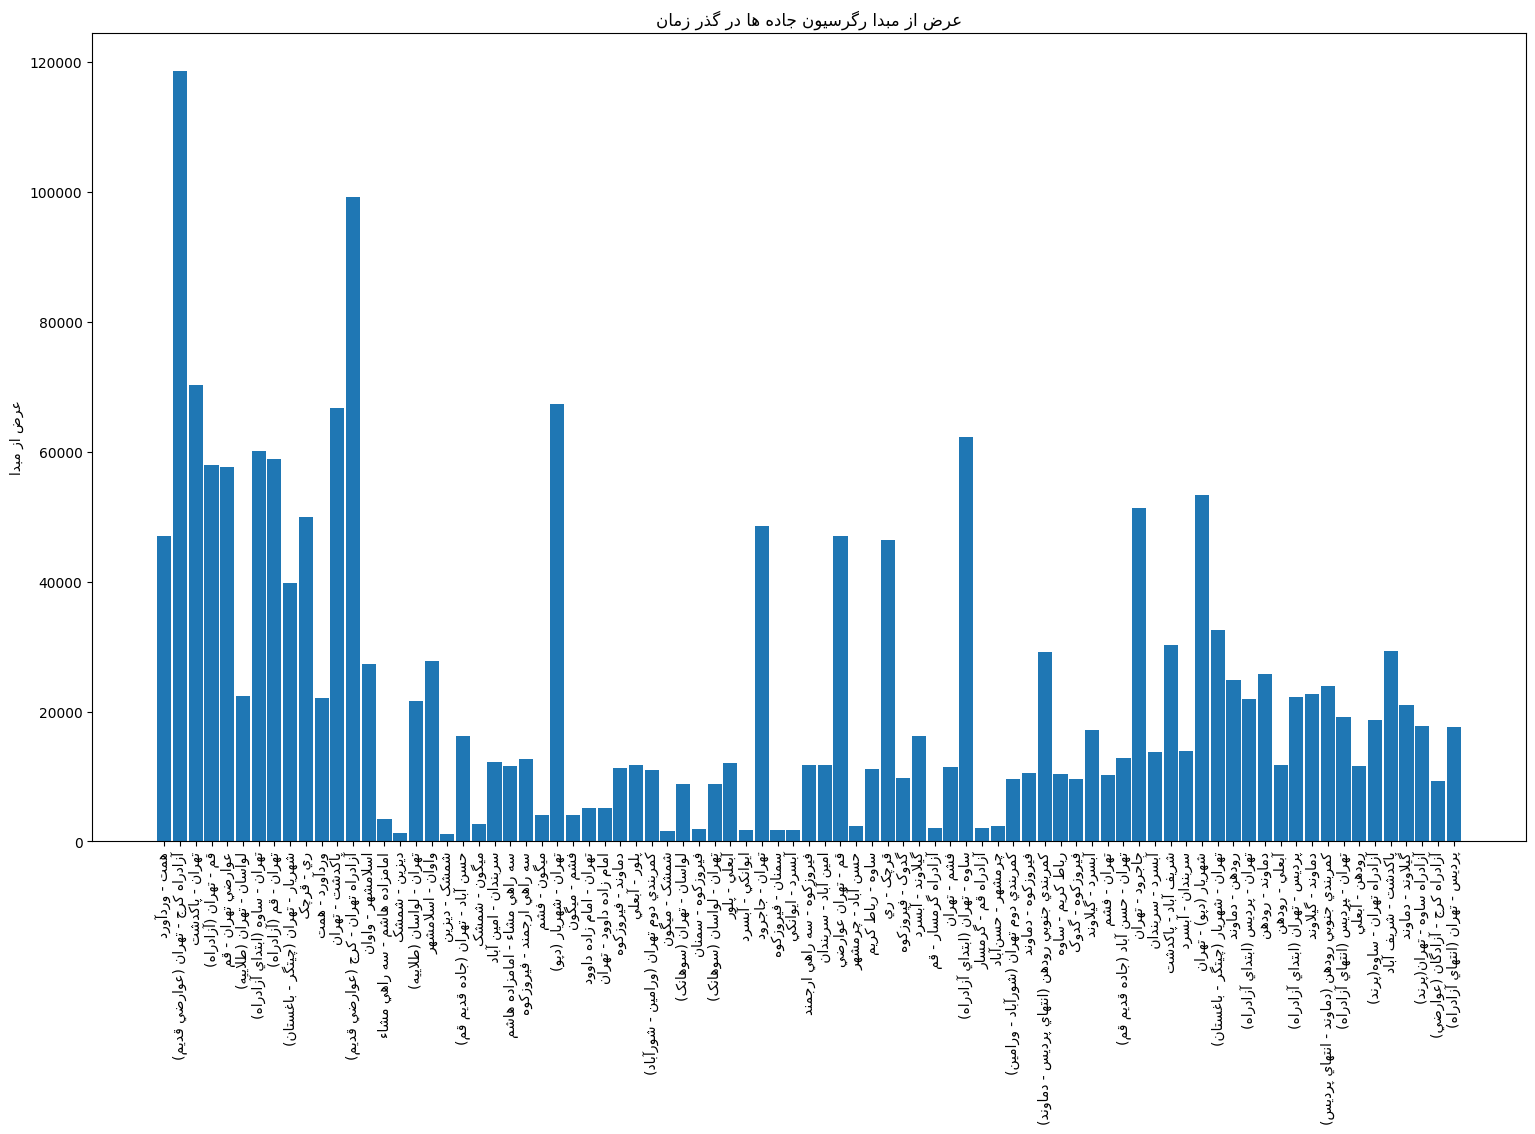

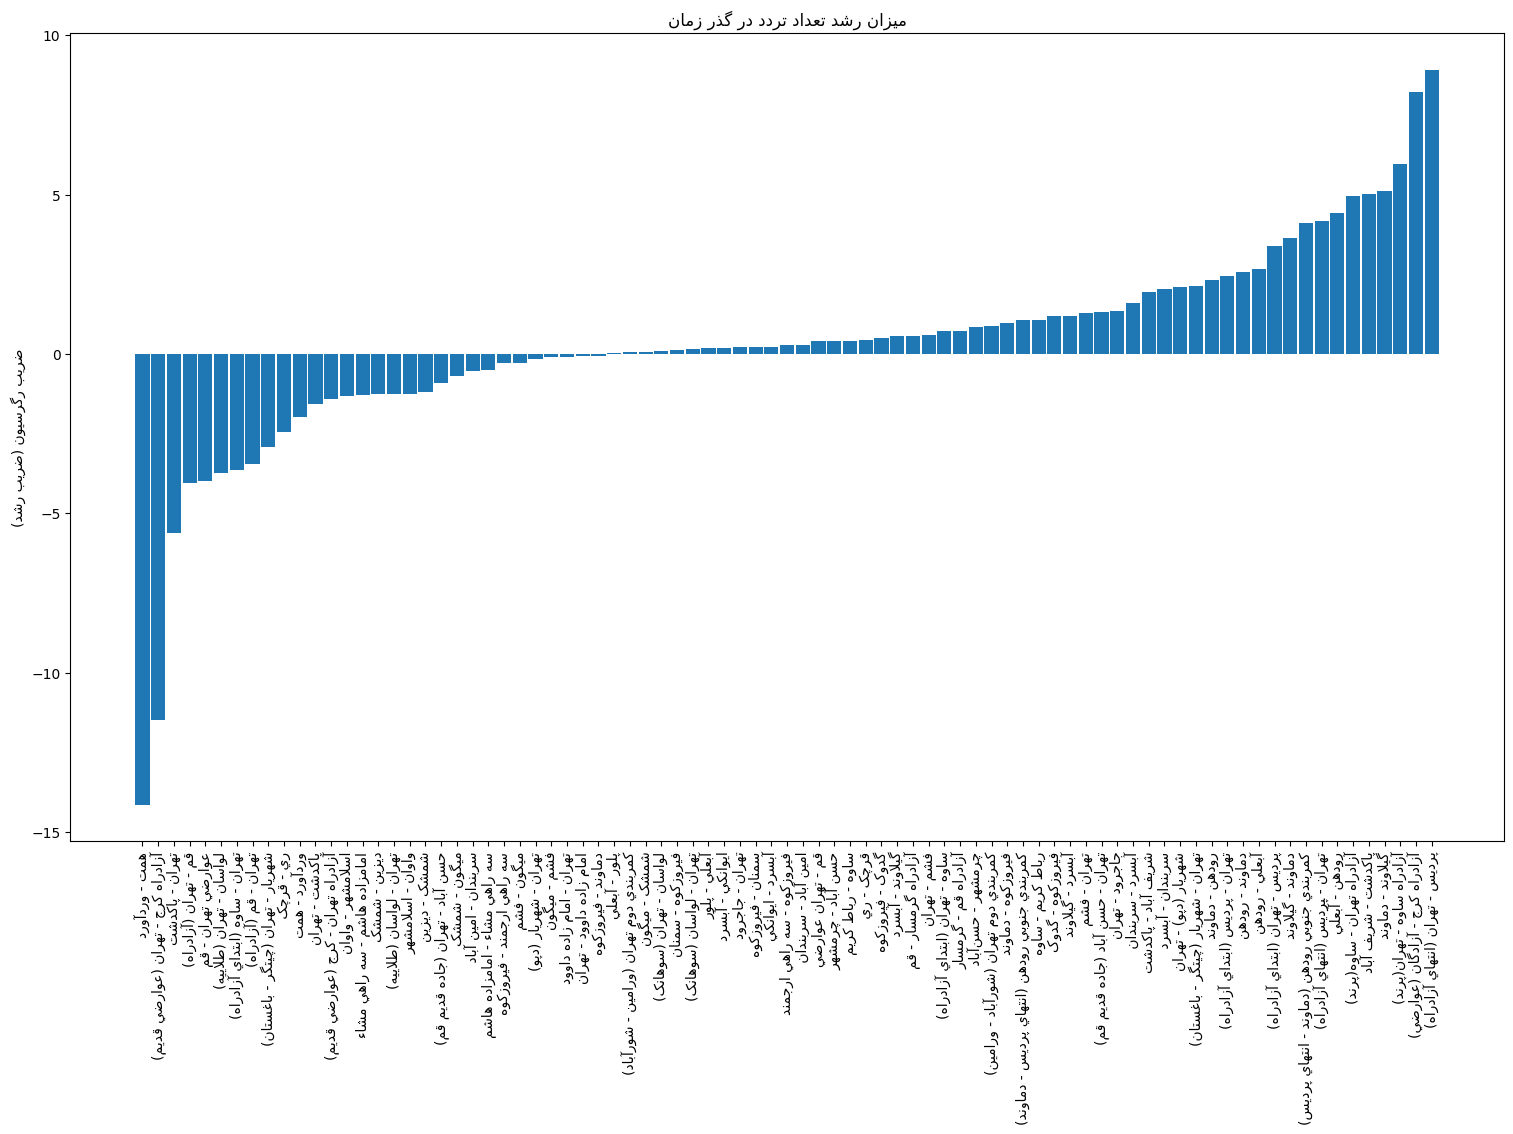

In [13]:
#Plot regression coef bar chart

fig, ax = plt.subplots()
regression_df = regression_df.sort_values(by='coef')
road_names = regression_df['name'].apply(file_handler.persian_fix)
coefs = regression_df['intercept']

ax.bar(road_names, coefs, width=0.9)
plt.xticks(rotation=90)

ax.set_ylabel(file_handler.persian_fix("عرض از مبدا"))
ax.set_title(file_handler.persian_fix("عرض از مبدا رگرسیون جاده ها در گذر زمان"))
# ax.legend(title='')
fig.set_size_inches(18.5, 10.5)
plt.savefig('img/road_growth_intercept.png', bbox_inches='tight')

plt.show()


fig, ax = plt.subplots()
regression_df = regression_df.sort_values(by='coef')
road_names = regression_df['name'].apply(file_handler.persian_fix)
coefs = regression_df['coef']

ax.bar(road_names, coefs, width=0.9)
plt.xticks(rotation=90)

ax.set_ylabel(file_handler.persian_fix("ضریب رگرسیون (ضریب رشد)"))
ax.set_title(file_handler.persian_fix("میزان رشد تعداد تردد در گذر زمان"))
# ax.legend(title='')
fig.set_size_inches(18.5, 10.5)
plt.savefig('img/road_growth_coef.png', bbox_inches='tight')

plt.show()



In [14]:
def sort_reg_form_High_to_low(regression):
    regression = {k: v for k, v in regression.items() if v != {}}
    sorted_models = sorted(regression.items(), key=lambda x: x[1].coef_[0])
    return sorted_models , regression

sorted_models , regression = sort_reg_form_High_to_low(roads_reg)
# for (name, coef) in sorted_models:
#     print(names[name], regression[name].coef_)

sorted_models[-1][1].coef_

array([8.91990877])

## check the extrime change in top roads
we sorted the road form most groth to least (negative) grouth , we only care about the extrem ones.

total road number
83


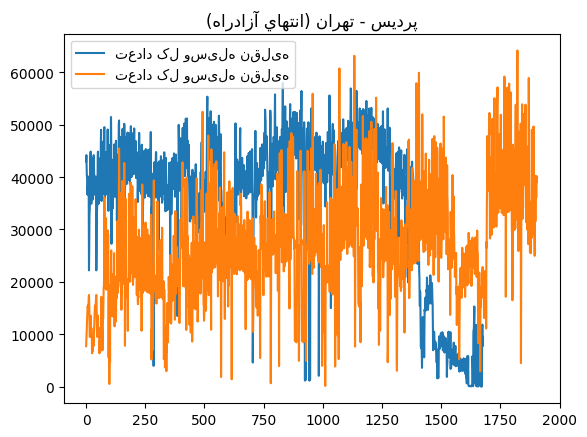

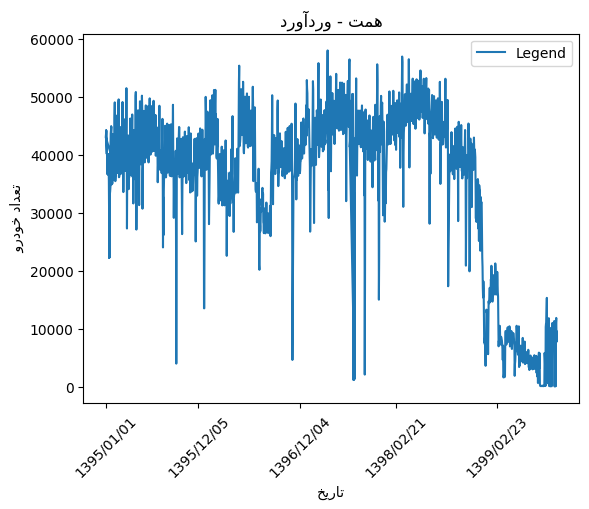

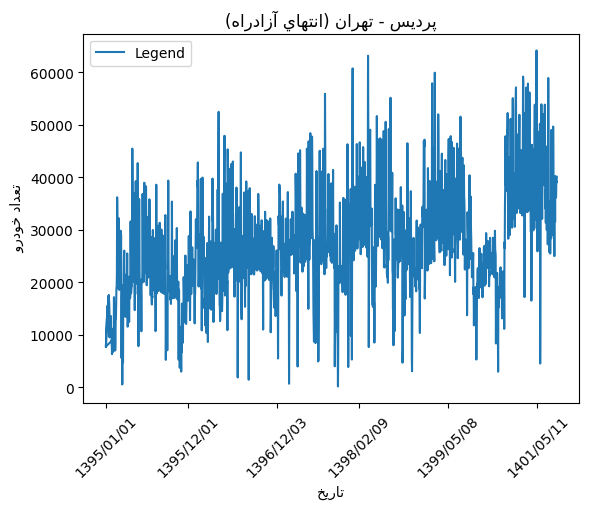

In [15]:
# Now lets plot some of these.
import file_handler
import importlib
importlib.reload(file_handler)

print("total road number")
print(len(sorted_models))

road_min = sorted_models[0]
road_max = sorted_models[-1]
df1=test_roads[road_min[0]]
df2=test_roads[road_max[0]]
ax = df1.iloc[:, [6]].plot(title=file_handler.persian_fix(names[road_min[0]]))
df2.iloc[:, [6]].plot(ax = ax, title=file_handler.persian_fix(names[road_max[0]]))


Draw_road_time_series(df1)
Draw_road_time_series(df2)

# show data on map :

## map of our data

In [16]:
def load_the_map_of_city(place,custom_filter,bbox):
    G = ox.graph_from_bbox(bbox=(36.1290,35.1525,52.4501,50.2940), retain_all=True, simplify = True, network_type='all', custom_filter=cf)
    # Prepare data
    u = []
    v = []
    key = []
    data = []
    for uu, vv, kkey, ddata in G.edges(keys=True, data=True): # added ww
        u.append(uu)
        v.append(vv)
        key.append(kkey)
        data.append(ddata)
    return G,data

def find_road_in_map_by_code(data,code):
    for item in data:
        if item.get('osmid') == code:
            print(item)

In [17]:
place = ["Tehran, Iran"]
cf = '["highway"~"trunk|motorway|primary"]'
bbox=(36.0290,35.0525,52.3501,50.1940)

G, data = load_the_map_of_city(place,cf,bbox)
find_road_in_map_by_code(data,4480201)

{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 19.377}
{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 539.103, 'geometry': <LINESTRING (51.367 35.561, 51.368 35.564, 51.369 35.564, 51.369 35.566)>}
{'osmid': 4480201, 'oneway': True, 'lanes': '3', 'ref': '7', 'name': 'آزادراه خلیج فارس', 'highway': 'motorway', 'maxspeed': '120', 'reversed': False, 'length': 17.774}


### code of importent road

In [18]:
from osmid import osmid_codes, osmid_names

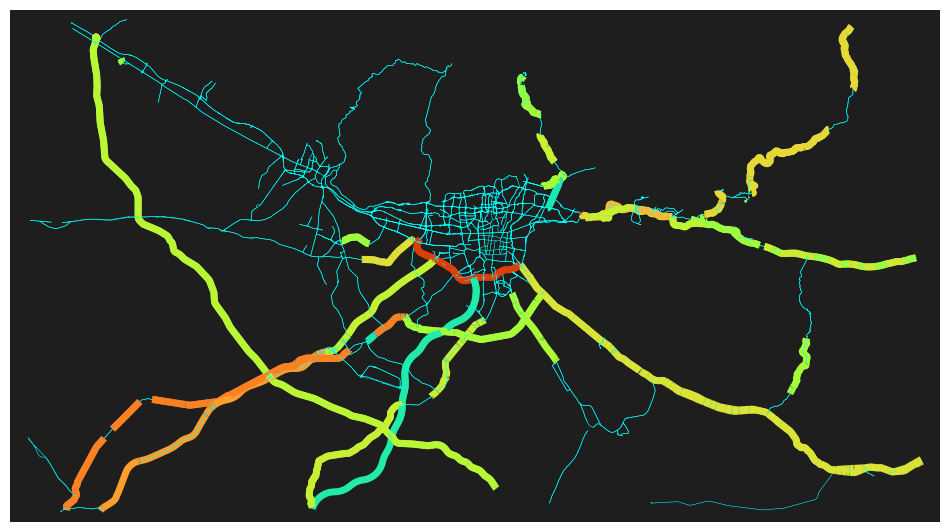

/tmp/ipykernel_4883/1381932870.py:102: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.tight_layout(pad=0)
/tmp/ipykernel_4883/1381932870.py:103: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.savefig("heatmap.jpg", dpi=600, bbox_inches='tight', format="png",


In [19]:
def map_drawer(data):
    roadCols = []
    edge_width = []
    # cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["red","orange", "green"])
    cmap = mpl.colormaps['turbo'].resampled(80)
    for item in data:
        mark = False
        if "osmid" in item.keys():
            # Check by code
            if type(item['osmid']) == list:
                # if a road has multiple osmid's see if any of them intersects.
                if len(set(item['osmid']).intersection(set(osmid_codes.keys()))) > 0:
                    edge = 5
                    mark = True
                    code = list(set(item['osmid']).intersection(
                        set(osmid_codes.keys())))[0]
            else:
                if item["osmid"] in list(osmid_codes.keys()):
                    edge = 5
                    code = item['osmid']
                    mark = True
        if mark:
            # get 6digit code
            _6d = str(osmid_codes[code])
            val = (regression[_6d].coef_)
            min = -12
            max = +12

            # normalize color
            val = (val - min)/(max - min)

            # check by names
        if ('name' in item.keys()):
            if type(item['name']) == str:
                if item["name"] in osmid_names.keys():
                    color = "#FFFFF0"
                    edge = 5
                    # els

                    mark = True
                    _6d = str(osmid_names[item['name']])
                    val = (regression[_6d].coef_)
                    min = -12
                    max = +12

                    # normalize color
                    val = (val - min)/(max - min)
        if mark:
            color = (mpl.colors.rgb2hex(cmap(val), keep_alpha=True))

        if not mark:
            color = "#00FFFF"
            edge = 0.4

        roadCols.append(color)
        edge_width.append(edge)

    # Plot
    bgcolor = "#1e1e1e"
    fig, ax = ox.plot_graph(G, node_size=0,
                            dpi=500, bgcolor=bgcolor,
                            save=False, edge_color=roadCols,
                            edge_linewidth=edge_width, edge_alpha=1, figsize=(12, 12))

    # fig, ax = ox.plot_graph(G, bgcolor='black', edge_linewidth=3, node_size=0,
    #                         show=False, close=False)
    global labels
    labels = []
    for _, edge in ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows():
        osmid_arr = np.array(edge['osmid']).tolist()
        good = False
        name = ''

        if type(osmid_arr) == int:
            if osmid_arr in osmid_codes:
                name = edge['name']
                good = True
        elif type(osmid_arr) == list:
            for c in osmid_arr:
                if c in osmid_codes:
                    good = True
                    break
            if good:
                name = sorted(edge['name'])[0]

        if good:
            c = edge['geometry'].centroid

            ax.title.set_size(14)
            if name in labels:
                continue

            labels.append(name)
            e1 = edge

            ax.annotate(file_handler.persian_fix(name),
                        (c.x, c.y), c='blue', size=4)


    # fig.show()

    fig.tight_layout(pad=0)
    fig.savefig("heatmap.jpg", dpi=600, bbox_inches='tight', format="png",
                facecolor=fig.get_facecolor(), transparent=False)
    fig
map_drawer(data)

In [20]:
test_roads['114552']

index  کد محور                        نام محور   زمان شروع  \
0        0   114552  آزادراه کرج - آزادگان (عوارضي)  1395/01/01   
1        1   114552  آزادراه کرج - آزادگان (عوارضي)  1395/01/02   
2        2   114552  آزادراه کرج - آزادگان (عوارضي)  1395/01/03   
3        3   114552  آزادراه کرج - آزادگان (عوارضي)  1395/01/04   
4        4   114552  آزادراه کرج - آزادگان (عوارضي)  1395/01/05   
..     ...      ...                             ...         ...   
272     25   114552  آزادراه کرج - آزادگان (عوارضي)  1395/08/26   
273     26   114552  آزادراه کرج - آزادگان (عوارضي)  1395/08/27   
274     27   114552  آزادراه کرج - آزادگان (عوارضي)  1395/08/28   
275     28   114552  آزادراه کرج - آزادگان (عوارضي)  1395/08/29   
276     29   114552  آزادراه کرج - آزادگان (عوارضي)  1395/08/30   

              زمان پایان  مدت زمان کارکرد(دقیقه)  تعداد کل وسیله نقلیه  \
0    1395/01/02 00:00:00                    1425                  6180   
1    1395/01/03 00:00:00                    1365                  5686   
2    1395/01/04 00:00:00                    1440                  6163   
3    1395/01/05 00:00:00                    1425                  5982   
4    1395/01/06 00:00:00                    1440                  6429   
..                   ...                     ...                   ...   
272  1395/08/27 00:00:00                    1440                 10479   
273  1395/08/28 00:00:00                    1440                  8670   
274  1395/08/29 00:00:00                    1440                  8478   
275  1395/08/30 00:00:00                    1425                  9746   
276  1395/09/01 00:00:00                    1440                  6422   

     تعداد وسیله نقلیه کلاس 1  تعداد وسیله نقلیه کلاس 2  \
0                        5834                       239   
1                        5414                       172   
2                        5796                       223   
3                        5186                       659   
4                        5972                       301   
..                        ...                       ...   
272                      9568                       553   
273                      8080                       375   
274                      8093                       193   
275                      8339                      1094   
276                      6163                       159   

     تعداد وسیله نقلیه کلاس 3  تعداد وسیله نقلیه کلاس 4  \
0                           6                        27   
1                           2                        21   
2                           3                        21   
3                           5                        29   
4                           6                        39   
..                        ...                       ...   
272                        18                        54   
273                         8                        21   
274                         4                        13   
275                        26                        80   
276                         1                         3   

     تعداد وسیله نقلیه کلاس 5  سرعت متوسط  تعداد تخلف سرعت غیرمجاز  \
0                          74       95.51                     1405   
1                          77       95.27                     1310   
2                         120       87.95                      832   
3                         103       94.41                     1239   
4                         111       92.63                     1248   
..                        ...         ...                      ...   
272                       286       95.51                     2493   
273                       186       97.06                     2223   
274                       175       92.46                     1693   
275                       207       94.52                     2125   
276                        96       94.90                     1431   

     تعداد تخلف فاصله غیرمجاز  تعداد تخلف سبقت غیرمج